**Phase 1**

**1. Import Necessary Libraries**

In [94]:
# Standard Libraries
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

# Deep Learning with TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Utilities
from itertools import product

**2. Load the Dataset**

In [19]:
# Load the dataset with error handling
try:
    file_path = '/kaggle/input/dataset/RTA Data 2020 to July 2023.xlsx'
    df = pd.read_excel(file_path, engine='openpyxl')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file was not found.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Dataset loaded successfully.


**3. Initial Data Inspection**

In [20]:
def initial_data_inspection(df):
    # Basic Overview
    print("First 5 rows:")
    display(df.head())

    print("\nData Summary and Types:")
    df.info()

    # Summary statistics for numerical columns
    print("\nSummary Statistics for Numerical Columns:")
    numeric_columns = df.select_dtypes(include=['number'])
    display(numeric_columns.describe())

    # Summary statistics for categorical columns
    print("\nSummary Statistics for Categorical Columns:")
    categorical_columns = df.select_dtypes(include=['object', 'category'])
    display(categorical_columns.describe())

    # Check for missing values
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    print("\nMissing Values and Percentage:")
    missing_summary = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage': missing_percentage
    }).sort_values(by='Percentage', ascending=False)
    display(missing_summary)

    # Cardinality of categorical features
    print("\nCardinality of Categorical Columns:")
    unique_values = df.nunique()
    display(unique_values.sort_values(ascending=False))

    # Value counts for categorical columns with few unique values
    for col in categorical_columns:
        if df[col].nunique() < 10:
            print(f"\nValue Counts for {col}:")
            display(df[col].value_counts())

    # Check for duplicate rows
    num_duplicates = df.duplicated().sum()
    if num_duplicates > 0:
        print(f"\nNumber of Duplicate Rows in Dataset: {num_duplicates}")
    else:
        print("\nNo Duplicate Rows Found in Dataset.")

    # Inspect data types and potential conversions
    print("\nColumns with Potential Data Type Issues:")
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                pd.to_numeric(df[col])
                print(f"Column '{col}' can potentially be converted to a numeric type.")
            except ValueError:
                continue

# Call the function for DataFrame
initial_data_inspection(df)

First 5 rows:


EcYear EcNumber            CallTime  \
0   2020    31486 2020-12-31 22:41:47   
1   2020    31485 2020-12-31 22:25:00   
2   2020    31483 2020-12-31 21:54:59   
3   2020    31482 2020-12-31 21:24:22   
4   2020    31479 2020-12-31 21:03:49   

                                       EmergencyArea TotalPatientsInEmergency  \
0                      NEAR APS SCHOOL FORT ROAD RWP                        1   
1  Infront of Daig.com, Near Dha gate 2,  gt road...                        1   
2  Muhammadi chowk arshad bakery khyaban e sirsye...                        1   
3  Gulzar e quaid, T/W Katcheri Near Attock Pump,...                        1   
4  Taaj Company Gawalmandi Chowk Liaqat Baag Road...                        1   

  Gender   Age HospitalName                             Reason  responsetime  \
0   Male  27.0          BBH                          Bike Slip          10.0   
1   Male  20.0          NaN                   Car hit Footpath          12.0   
2   Male  48.0          BBH              Rickshaw hit with Car          10.0   
3   Male  45.0          NaN            Car hit Car and runaway           5.0   
4   Male  22.0          NaN  Unknown Bike hit Bike and runaway           5.0   

   ... BikesInvolved BusesInvolved CarsInvolved CartInvovled  \
0  ...           1.0           0.0          0.0          0.0   
1  ...           0.0           0.0          1.0          0.0   
2  ...           0.0           0.0          1.0          0.0   
3  ...           0.0           0.0          2.0          0.0   
4  ...           2.0           0.0          0.0          0.0   

   RickshawsInvolved  TractorInvovled  TrainsInvovled  TrucksInvolved  \
0                0.0              0.0             0.0             0.0   
1                0.0              0.0             0.0             0.0   
2                1.0              0.0             0.0             0.0   
3                0.0              0.0             0.0             0.0   
4                0.0              0.0             0.0             0.0   

   VansInvolved  OthersInvolved  
0           0.0             0.0  
1           0.0             0.0  
2           0.0             0.0  
3           0.0             0.0  
4           0.0             0.0  

[5 rows x 25 columns]


Data Summary and Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   EcYear                    46189 non-null  object        
 1   EcNumber                  38978 non-null  object        
 2   CallTime                  40233 non-null  datetime64[ns]
 3   EmergencyArea             46188 non-null  object        
 4   TotalPatientsInEmergency  46189 non-null  object        
 5   Gender                    46188 non-null  object        
 6   Age                       46188 non-null  float64       
 7   HospitalName              24239 non-null  object        
 8   Reason                    46188 non-null  object        
 9   responsetime              46184 non-null  float64       
 10  EducationTitle            46188 non-null  object        
 11  InjuryType                46187 non-null  object       

Age  responsetime  BicycleInvovled  BikesInvolved  \
count  46188.000000  46184.000000     46187.000000   46187.000000   
mean      32.447129      6.256106         0.008725       0.967242   
std       15.176229      4.901342         0.093467       0.578776   
min        0.000000      1.000000         0.000000       0.000000   
25%       21.000000      3.000000         0.000000       1.000000   
50%       29.000000      5.000000         0.000000       1.000000   
75%       42.000000      8.000000         0.000000       1.000000   
max      118.000000    101.000000         2.000000      10.000000   

       BusesInvolved  CarsInvolved  CartInvovled  RickshawsInvolved  \
count   46187.000000  46187.000000  46187.000000       46187.000000   
mean        0.009202      0.234049      0.001970           0.087297   
std         0.100349      0.448054      0.044344           0.289319   
min         0.000000      0.000000      0.000000           0.000000   
25%         0.000000      0.000000      0.000000           0.000000   
50%         0.000000      0.000000      0.000000           0.000000   
75%         0.000000      0.000000      0.000000           0.000000   
max         2.000000      5.000000      1.000000           2.000000   

       TractorInvovled  TrainsInvovled  TrucksInvolved  VansInvolved  \
count     46187.000000    46187.000000    46187.000000  46187.000000   
mean          0.009830        0.002208        0.044948      0.117392   
std           0.098657        0.046942        0.220947      0.334686   
min           0.000000        0.000000        0.000000      0.000000   
25%           0.000000        0.000000        0.000000      0.000000   
50%           0.000000        0.000000        0.000000      0.000000   
75%           0.000000        0.000000        0.000000      0.000000   
max           1.000000        1.000000        3.000000      4.000000   

       OthersInvolved  
count    46187.000000  
mean         0.009656  
std          0.098893  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          2.000000


Summary Statistics for Categorical Columns:


EcYear  EcNumber                                      EmergencyArea  \
count    46189     38978                                              46188   
unique       5     34800                                              37520   
top       2022        35   Railway Track Underpass Nazar Chowk Near Kach...   
freq     12902         3                                                 42   

        TotalPatientsInEmergency Gender HospitalName Reason EducationTitle  \
count                      46189  46188        24239  46188          46188   
unique                        13      4          162  23940              9   
top                            1   Male          BBH   same         Matric   
freq                       36151  39794         6953   2328          15697   

       InjuryType       Cause     PatientStatus  
count       46187       46187             46187  
unique          5           7                 3  
top         Minor  Over Speed  Alive & unstable  
freq        34788       29586             23788


Missing Values and Percentage:


Missing Values  Percentage
HospitalName                       21950   47.522137
EcNumber                            7211   15.611942
CallTime                            5956   12.894845
responsetime                           5    0.010825
BicycleInvovled                        2    0.004330
PatientStatus                          2    0.004330
Cause                                  2    0.004330
InjuryType                             2    0.004330
BikesInvolved                          2    0.004330
TrainsInvovled                         2    0.004330
CartInvovled                           2    0.004330
RickshawsInvolved                      2    0.004330
TractorInvovled                        2    0.004330
VansInvolved                           2    0.004330
TrucksInvolved                         2    0.004330
BusesInvolved                          2    0.004330
CarsInvolved                           2    0.004330
OthersInvolved                         2    0.004330
Age                                    1    0.002165
EmergencyArea                          1    0.002165
Reason                                 1    0.002165
Gender                                 1    0.002165
EducationTitle                         1    0.002165
TotalPatientsInEmergency               0    0.000000
EcYear                                 0    0.000000


Cardinality of Categorical Columns:


CallTime                    40170
EmergencyArea               37520
EcNumber                    34800
Reason                      23940
HospitalName                  162
Age                           100
responsetime                   68
TotalPatientsInEmergency       13
EducationTitle                  9
Cause                           7
CarsInvolved                    6
BikesInvolved                   5
EcYear                          5
VansInvolved                    5
InjuryType                      5
Gender                          4
TrucksInvolved                  4
BusesInvolved                   3
BicycleInvovled                 3
PatientStatus                   3
RickshawsInvolved               3
OthersInvolved                  3
CartInvovled                    2
TractorInvovled                 2
TrainsInvovled                  2
dtype: int64


Value Counts for EcYear:


EcYear
2022        12902
2021        12677
2020        11382
2023         9227
Hospital        1
Name: count, dtype: int64


Value Counts for Gender:


Gender
Male      39794
Female     6392
Other         1
0             1
Name: count, dtype: int64


Value Counts for EducationTitle:


EducationTitle
Matric          15697
Primary         11717
Illetrate       10845
Intermediate     5675
Graduation       1686
Masters           439
Middle            119
PHD                 9
0                   1
Name: count, dtype: int64


Value Counts for InjuryType:


InjuryType
Minor                 34788
Single Fracture        6737
Head Injury            3503
Multiple Fractures      778
Spinal Injury           381
Name: count, dtype: int64


Value Counts for Cause:


Cause
Over Speed      29586
Carelessness    14177
U Turn            934
Wrong Turn        841
Tyre Burst        481
Others            104
One Wheeling       64
Name: count, dtype: int64


Value Counts for PatientStatus:


PatientStatus
Alive & unstable    23788
Alive & stable      21812
Dead                  587
Name: count, dtype: int64


Number of Duplicate Rows in Dataset: 8

Columns with Potential Data Type Issues:


**4. Initial Data Preprocessing**

In [21]:
def preprocess_data(df):
    # Drop rows where essential fields are missing
    df_cleaned = df.dropna(subset=['CallTime', 'responsetime', 'EcNumber']).copy()

    # Fill missing HospitalName with 'Unknown'
    df_cleaned['HospitalName'] = df_cleaned['HospitalName'].fillna('Unknown')

    # Fill the minimal missing values in numeric columns with 0 (for vehicle involvement)
    vehicle_columns = [
        'BikesInvolved', 'BusesInvolved', 'CarsInvolved', 'CartInvovled',
        'RickshawsInvolved', 'TractorInvovled', 'TrainsInvovled',
        'TrucksInvolved', 'VansInvolved', 'OthersInvolved'
    ]
    df_cleaned[vehicle_columns] = df_cleaned[vehicle_columns].fillna(0)

    # Fill missing 'Age' with the median
    df_cleaned['Age'] = df_cleaned['Age'].fillna(df_cleaned['Age'].median())

    # Convert 'CallTime' to datetime, handling errors
    df_cleaned['CallTime'] = pd.to_datetime(df_cleaned['CallTime'], errors='coerce')

    # Extracting Year, Month, Day, Hour from CallTime
    df_cleaned['Year'] = df_cleaned['CallTime'].dt.year
    df_cleaned['Month'] = df_cleaned['CallTime'].dt.month
    df_cleaned['Day'] = df_cleaned['CallTime'].dt.day
    df_cleaned['Hour'] = df_cleaned['CallTime'].dt.hour

    return df_cleaned

# Call the function to clean the data
df_cleaned = preprocess_data(df)

**5. Exploratory Data Analysis (EDA)**

**5.1. Univariate Analysis**

**5.1.1. Numerical Variables**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

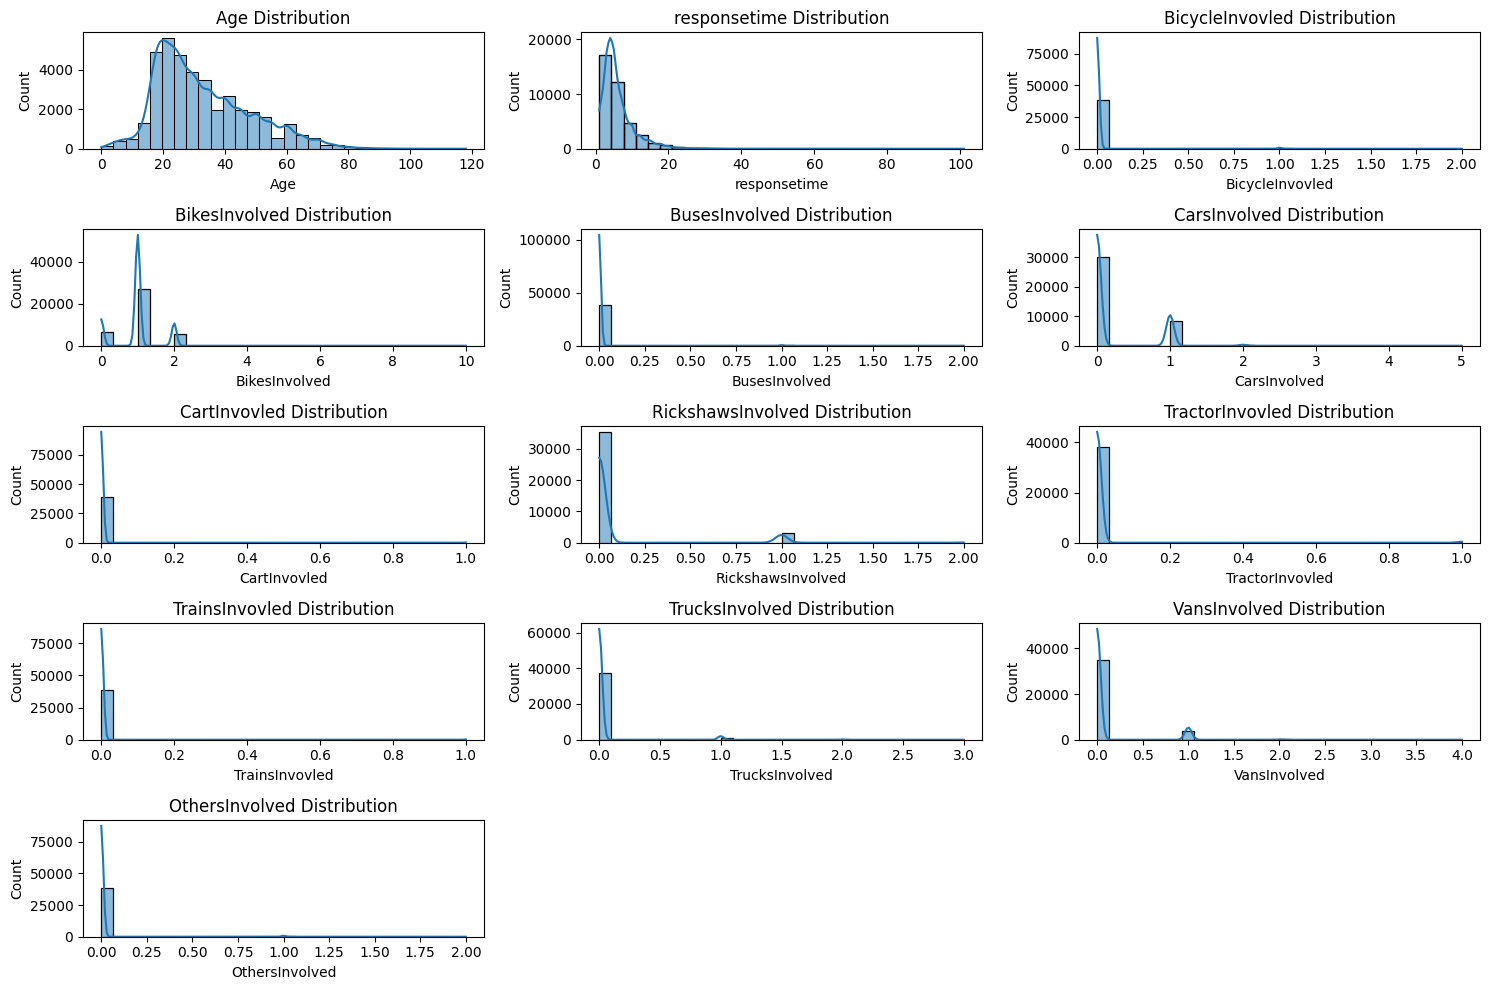

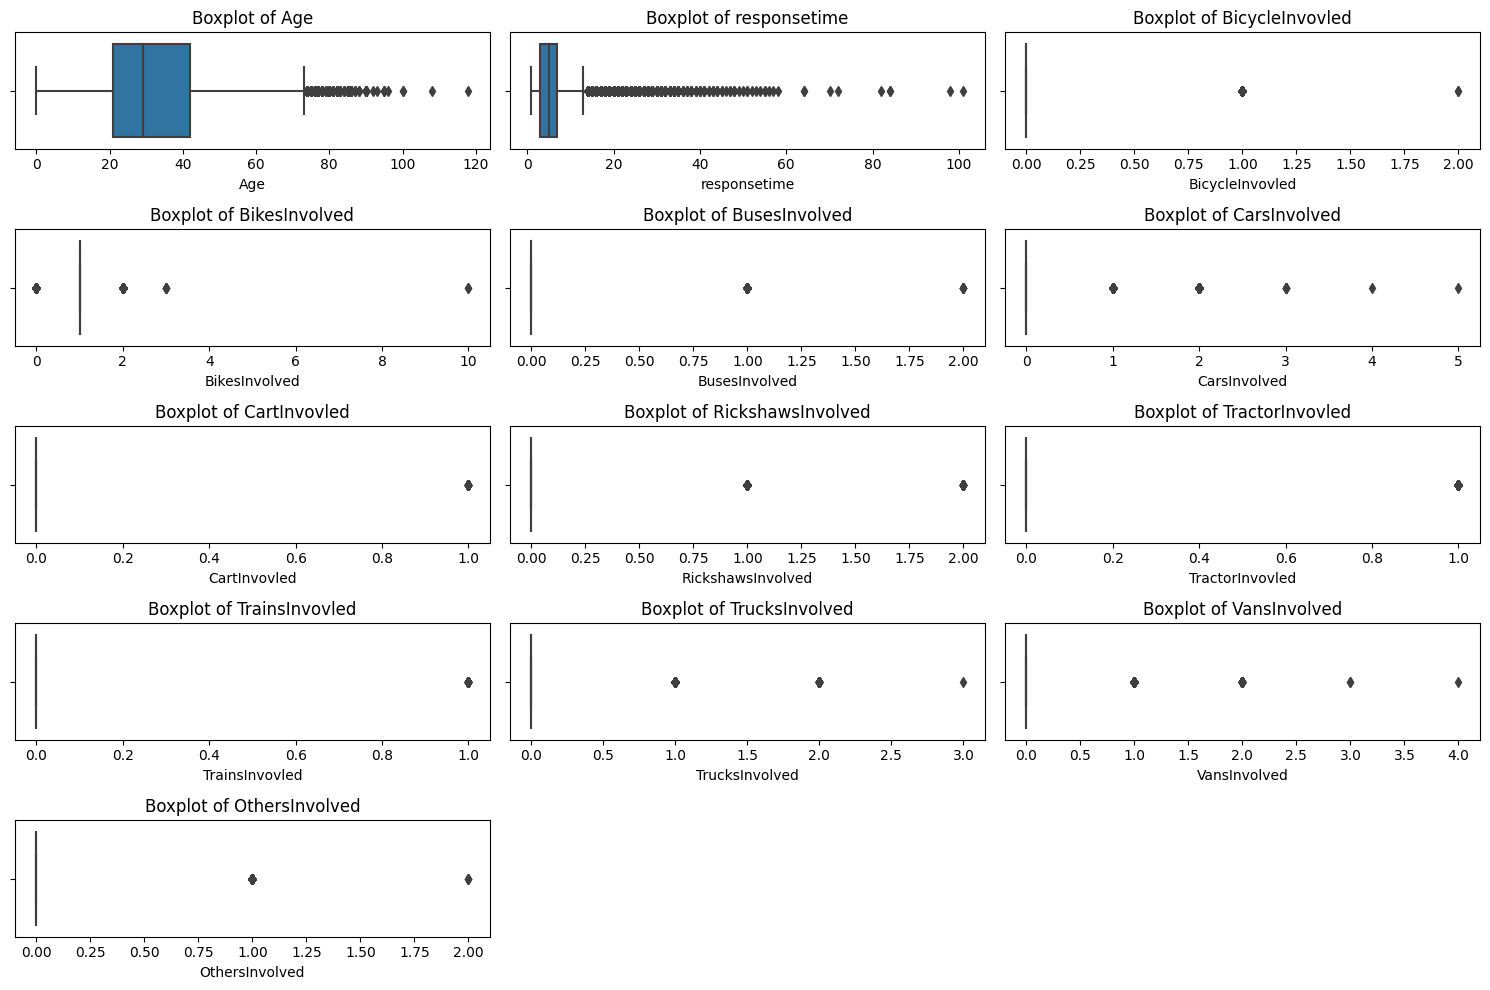

In [22]:
# Replace infinite values with NaN in df_cleaned
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan)
df_cleaned = df_cleaned.dropna()  # Optionally drop rows with NaNs if needed

# Combined histogram and KDE for all numerical variables
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms with KDE
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f'{col} Distribution')
    plt.tight_layout()
plt.show()

# Boxplots to inspect spread and outliers for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()

**5.1.2. Categorical Variables**

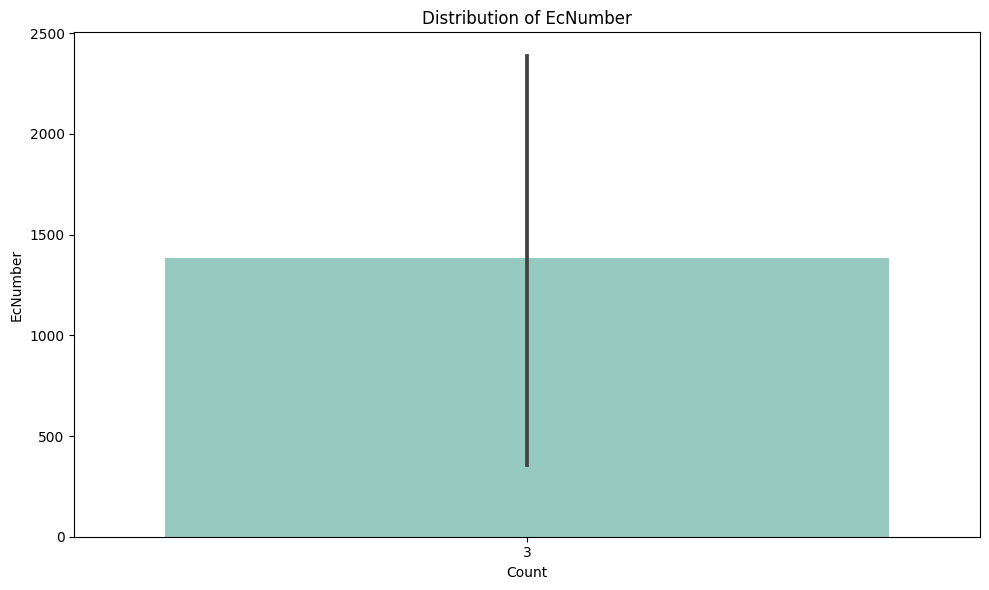

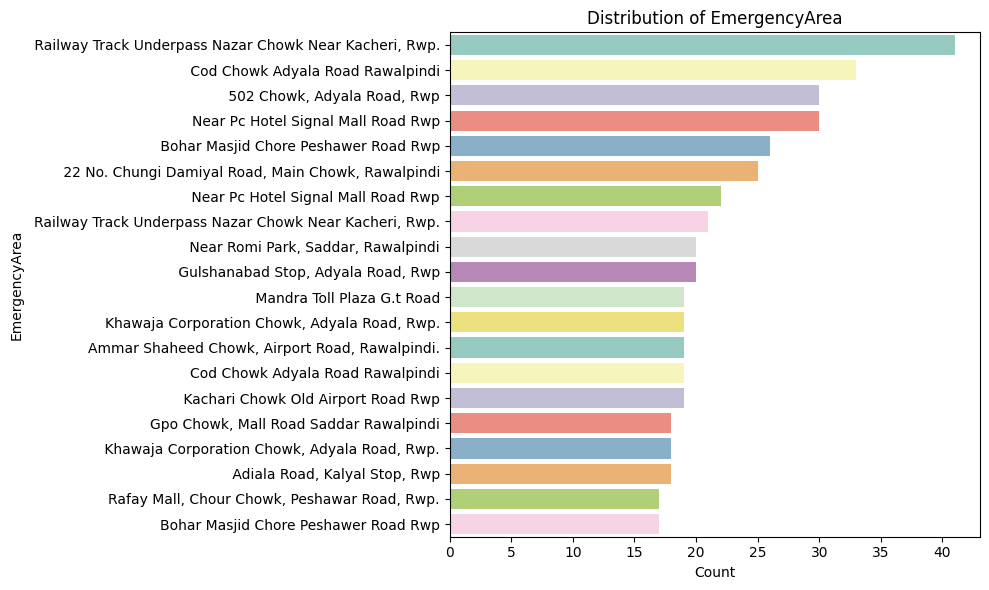

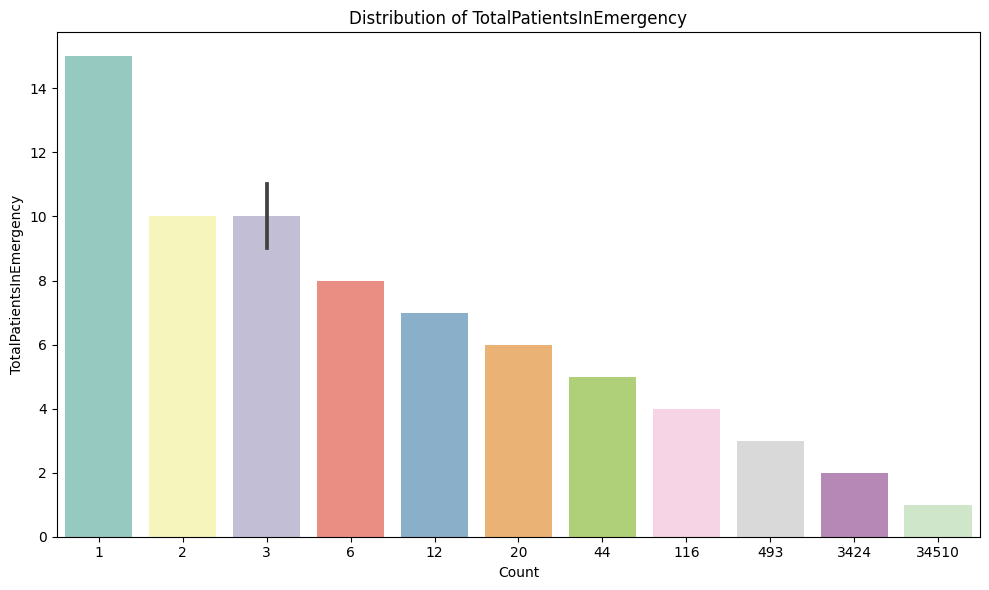

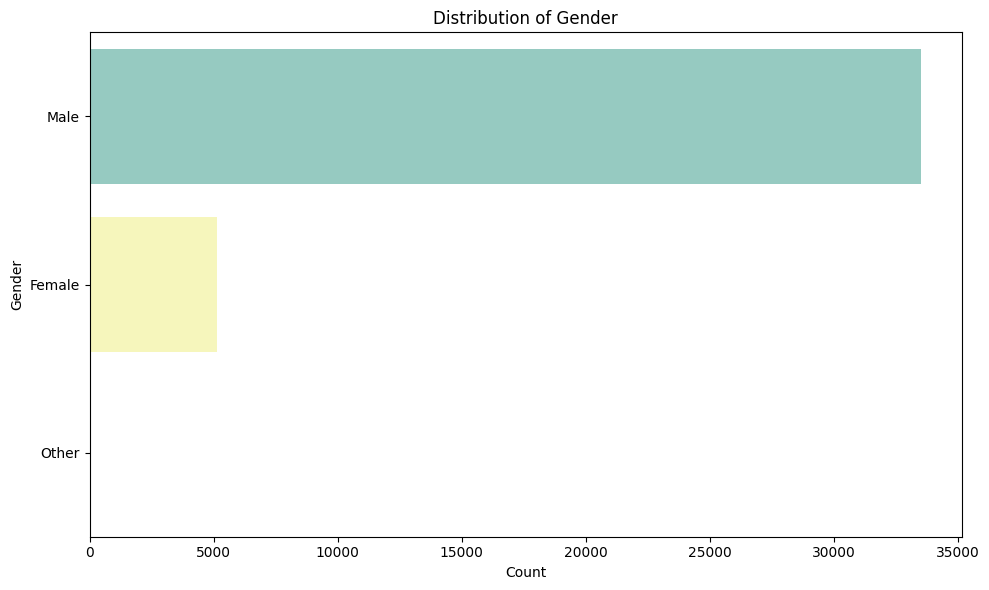

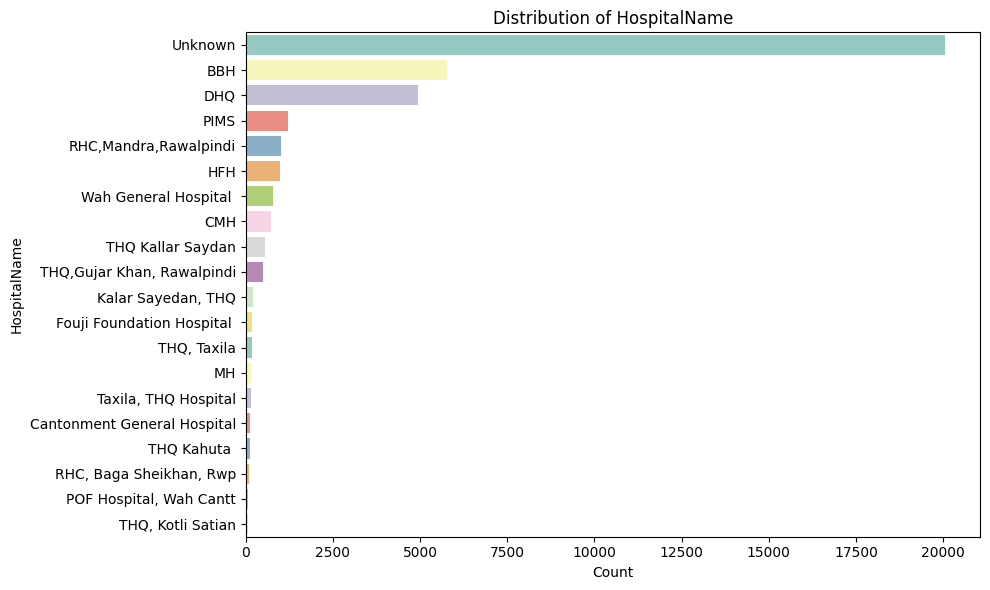

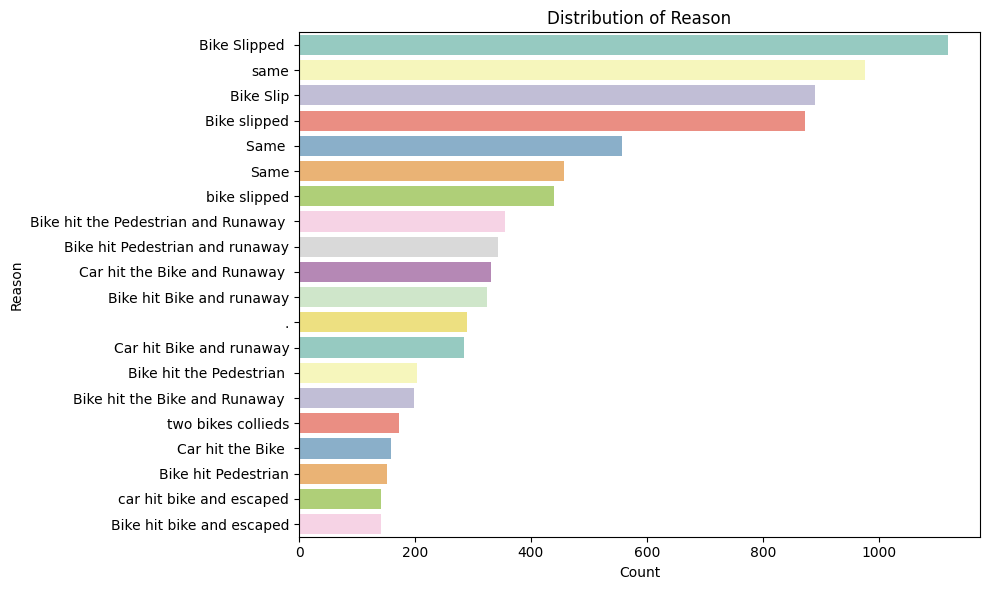

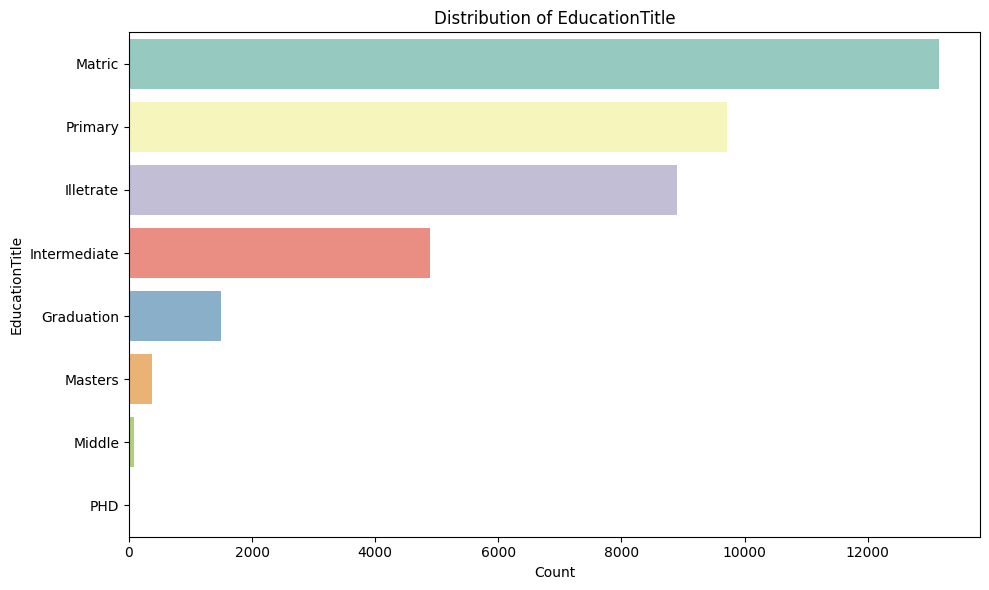

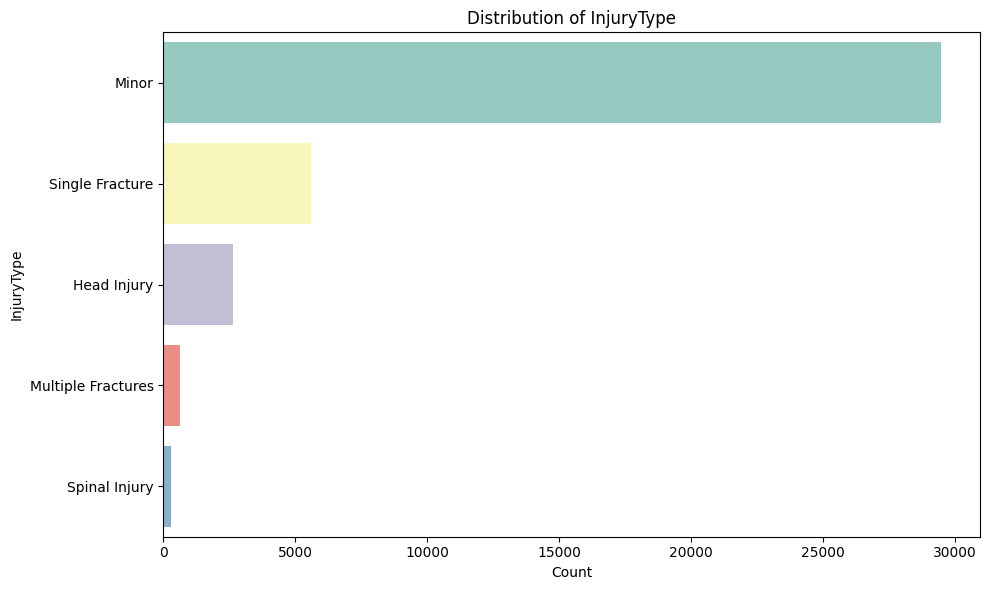

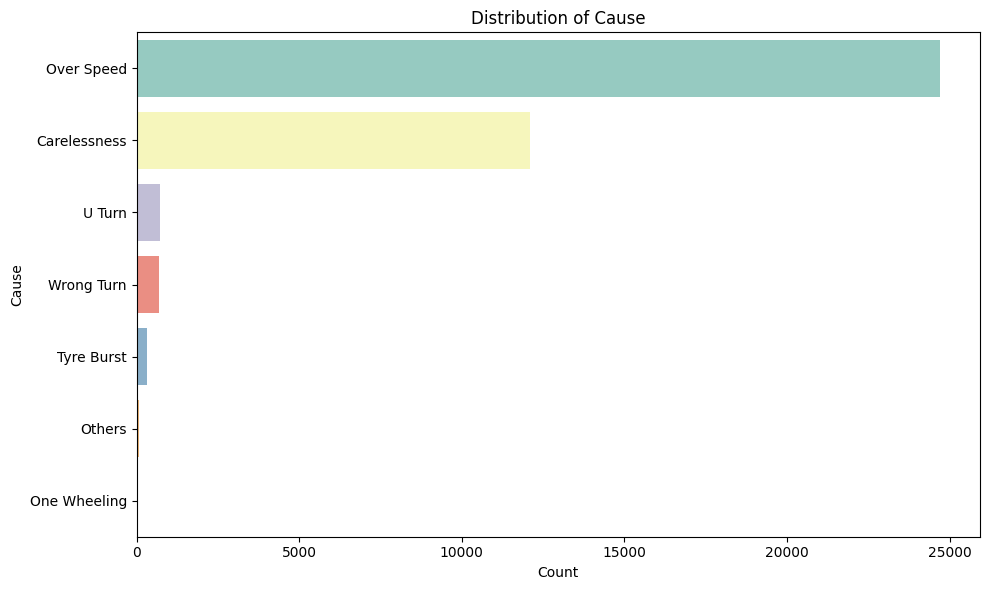

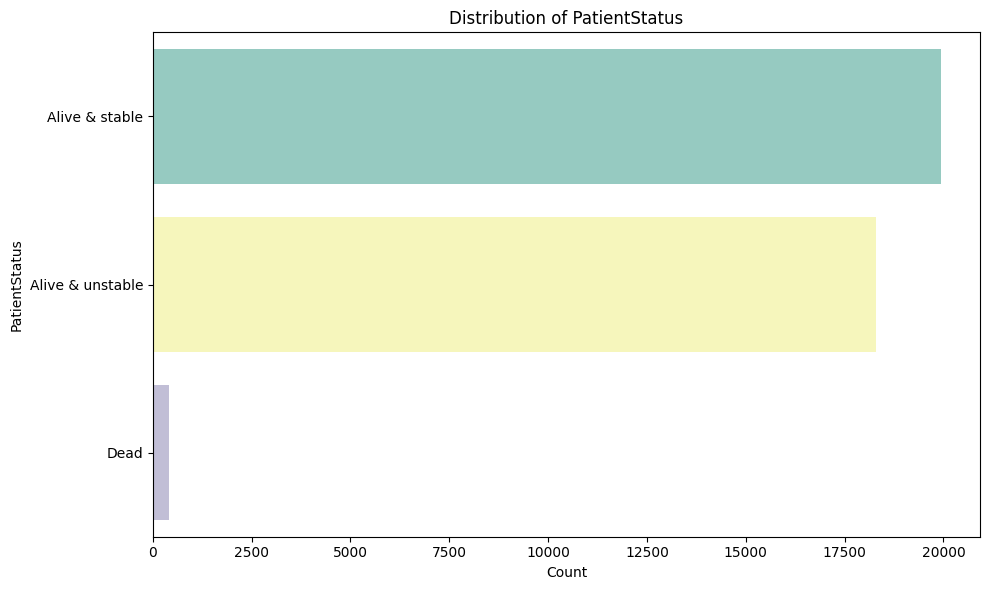

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))


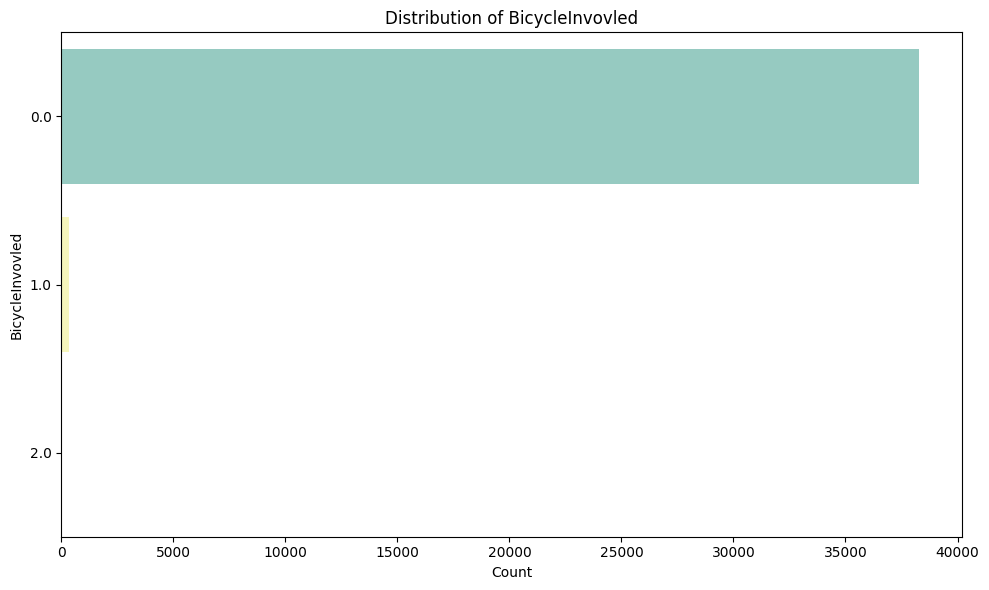

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))


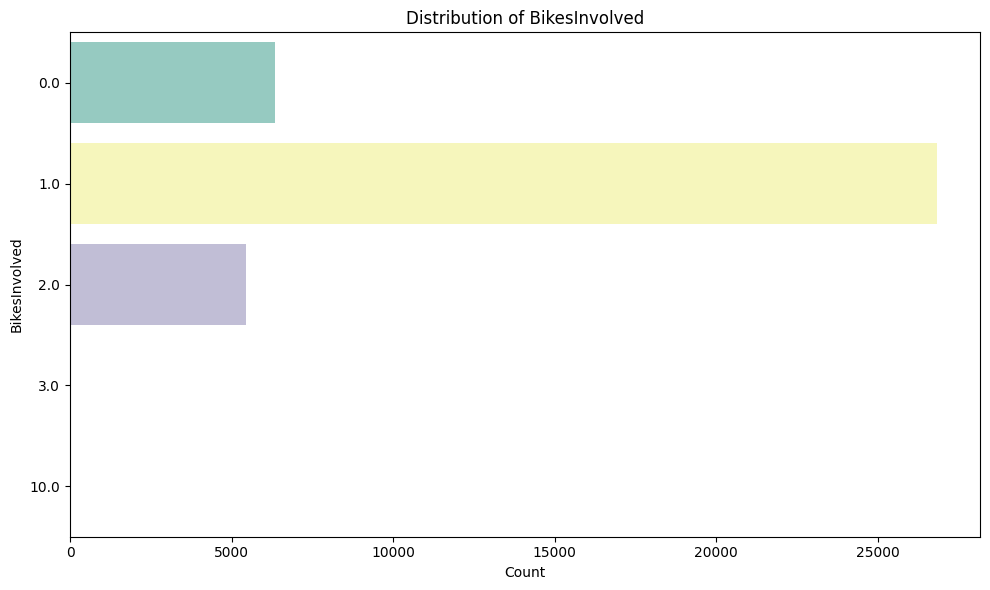

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))


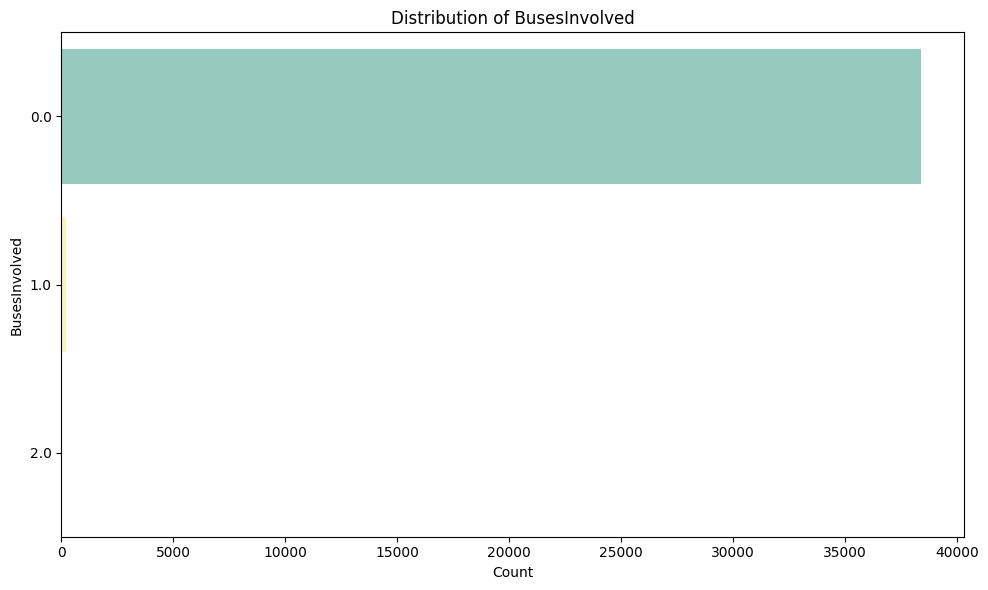

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))


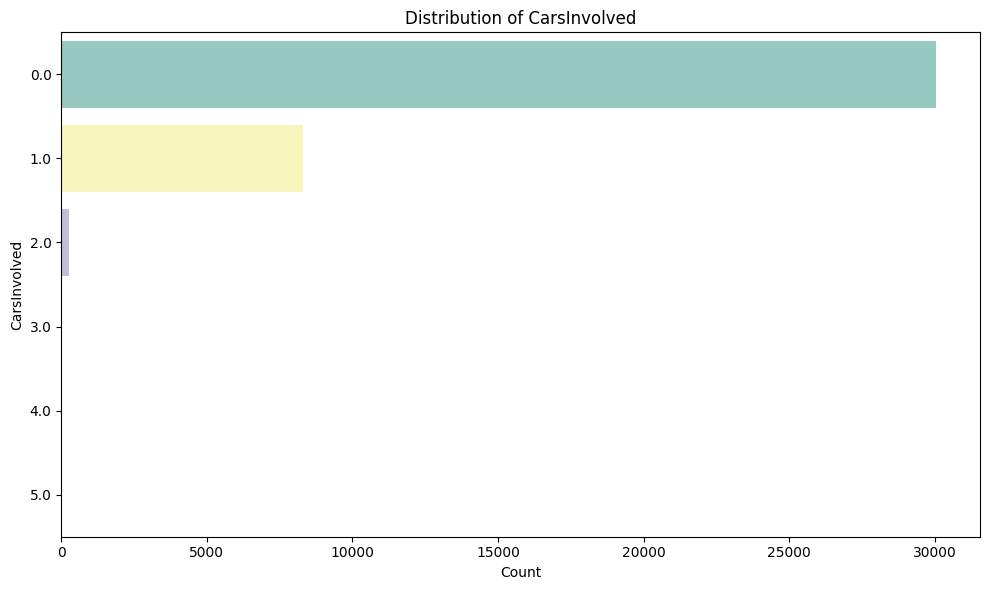

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))


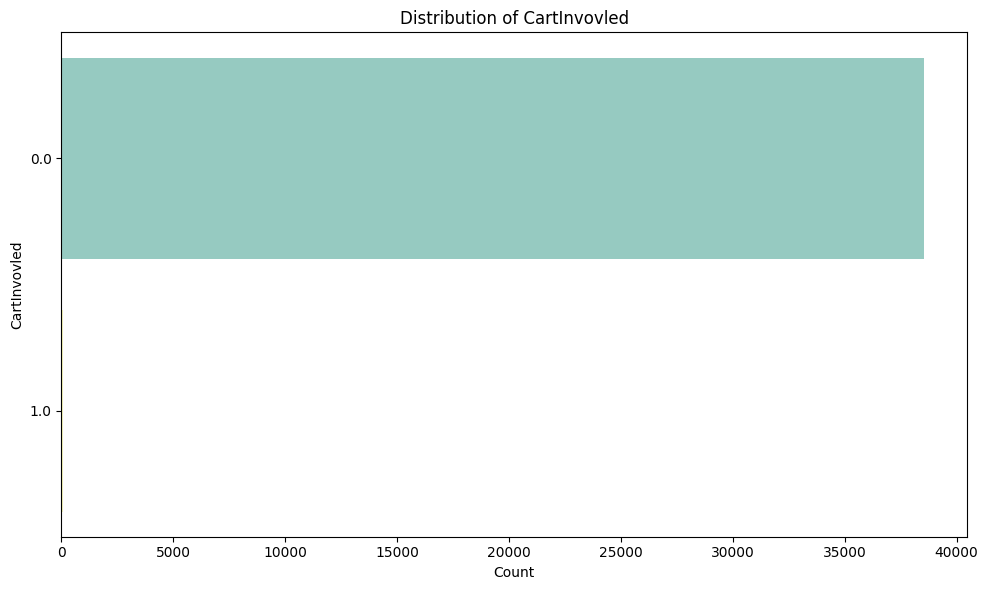

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))


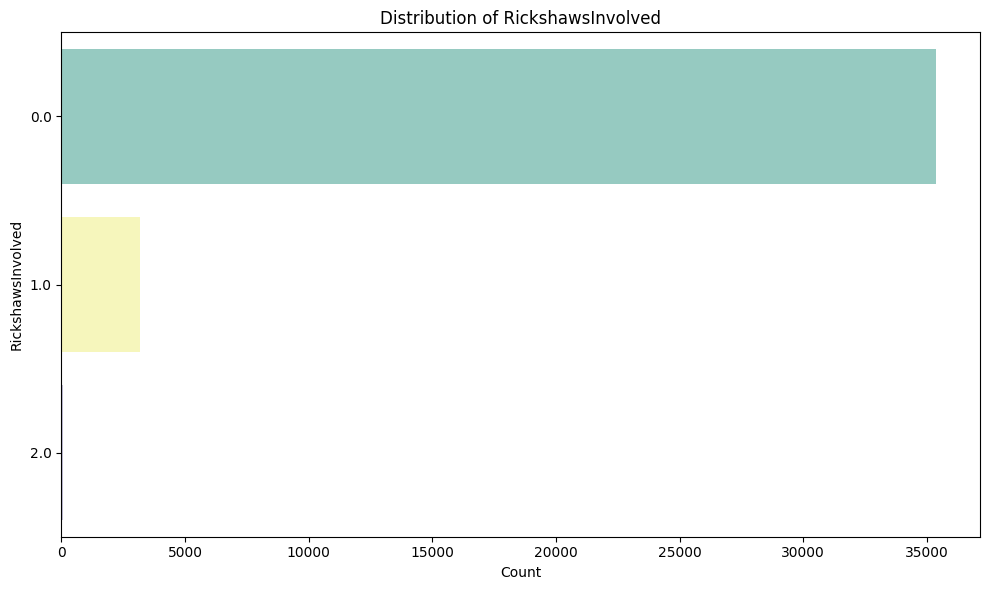

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))


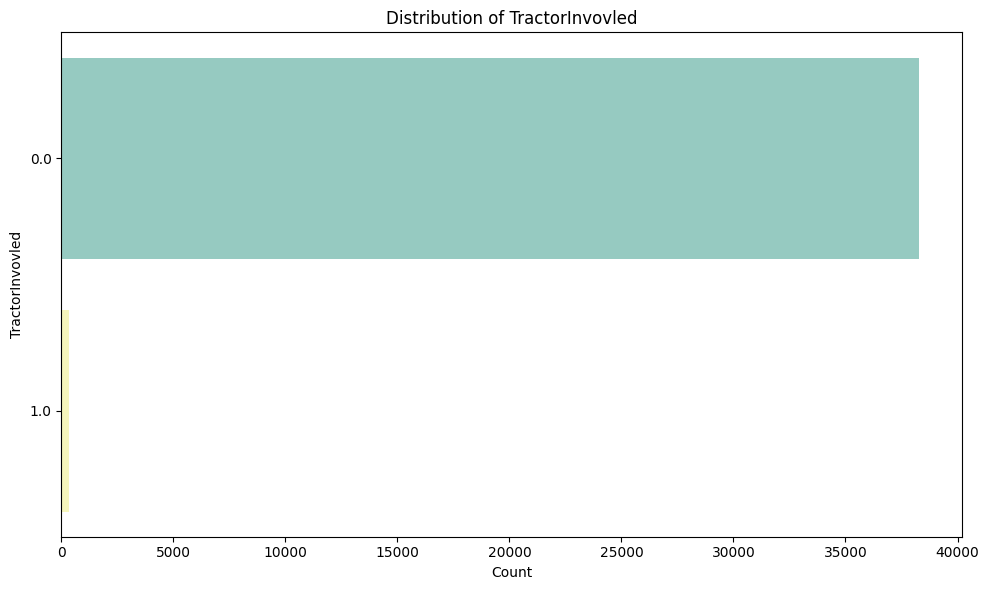

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))


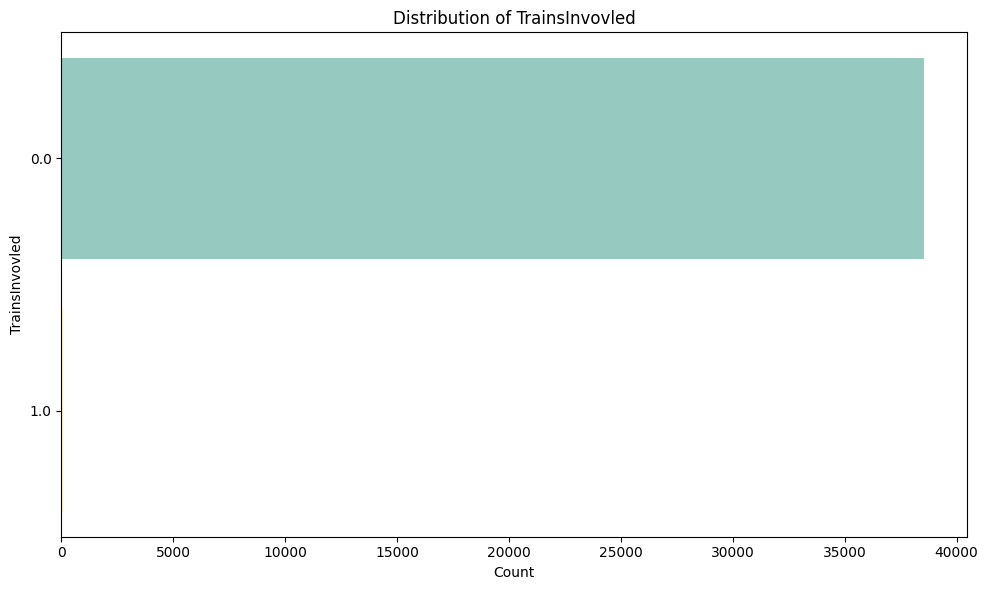

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))


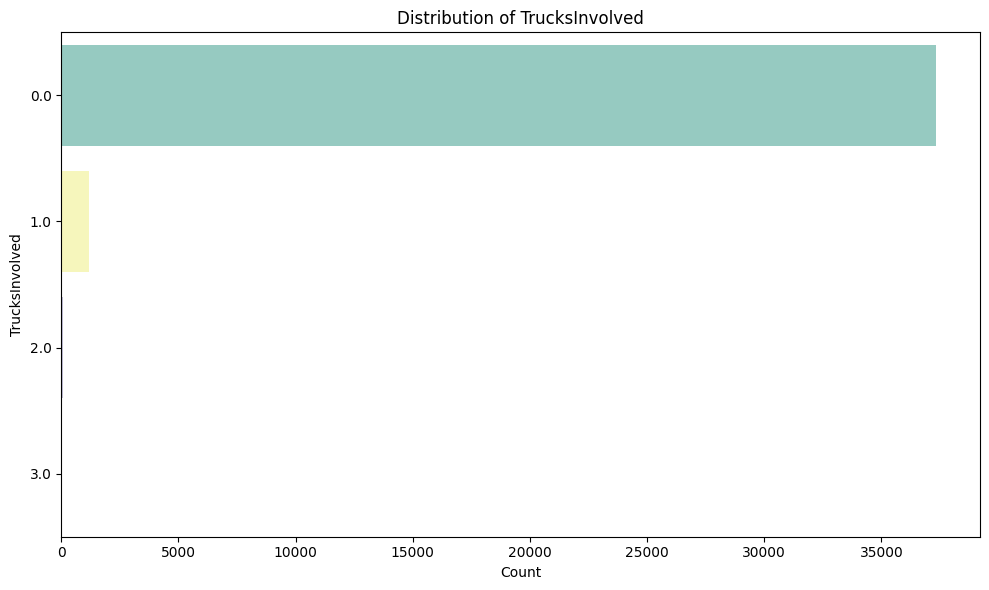

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))


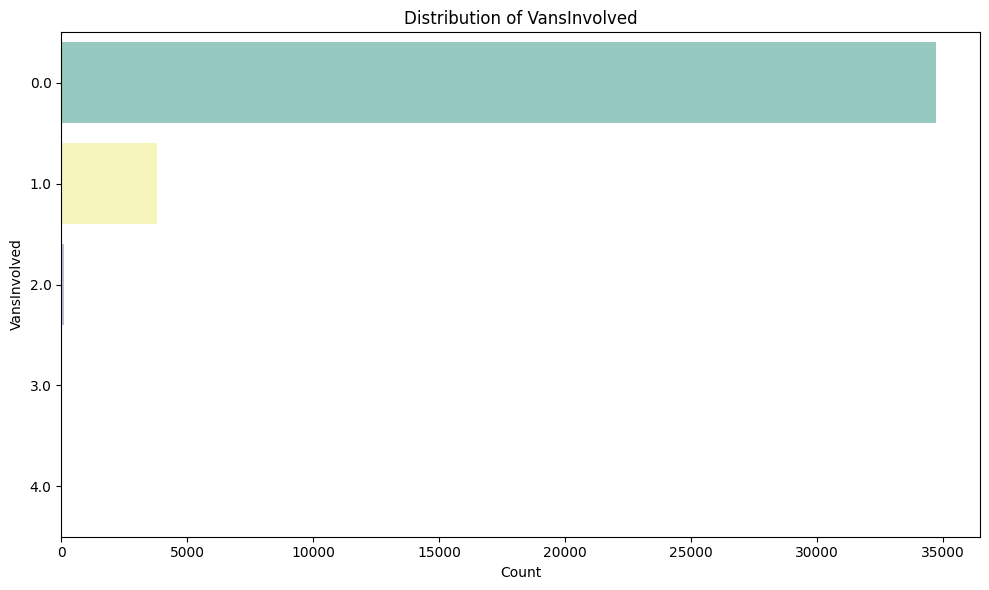

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))


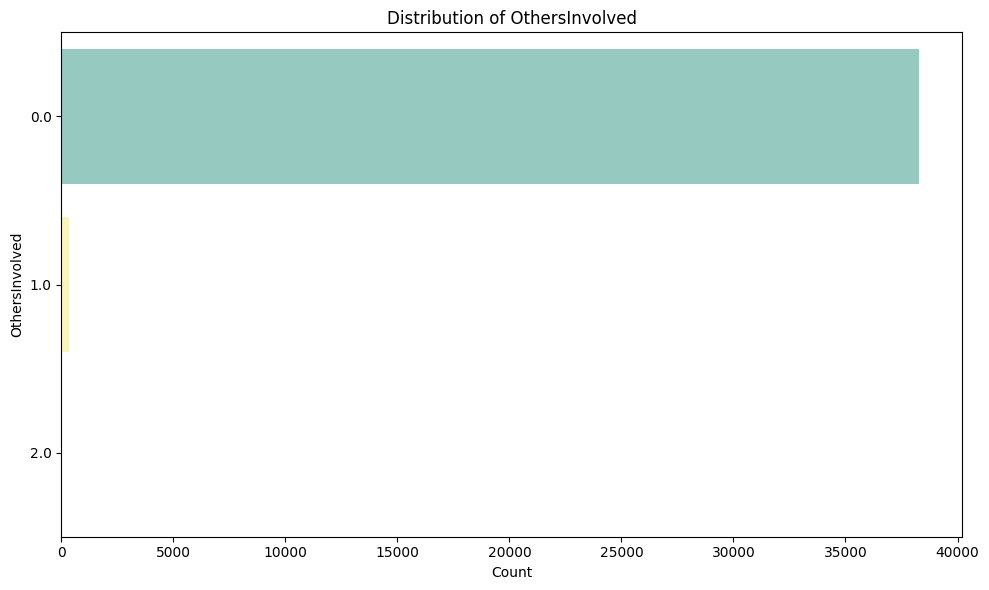

In [25]:
# Function to clean categorical columns
def clean_categorical_columns(df):
    # Convert numeric columns with fewer than 20 unique values to categorical,
    # excluding 'EcYear' from conversion.
    df_cleaned = df.copy()
    for col in df_cleaned.columns:
        # Exclude 'EcYear' from conversion
        if col != 'EcYear':
            # If column is numeric and has fewer than 20 unique values, convert to category
            if df_cleaned[col].dtype in ['int64', 'float64'] and df_cleaned[col].nunique() < 20:
                df_cleaned[col] = df_cleaned[col].astype('category')
    return df_cleaned

# Function to plot categorical variables
def plot_categorical_columns(df, max_categories=20):
    # Plot bar charts for categorical columns in a DataFrame.
    # df: The DataFrame containing the data.
    # max_categories: The maximum number of categories to display in the chart.
    df_cleaned = clean_categorical_columns(df)
    categorical_columns = df_cleaned.select_dtypes(include=['object', 'category']).columns

    # Set a nicer color palette
    sns.set_palette("Set3")

    for col in categorical_columns:
        # Get the value counts and limit to top 'max_categories'
        value_counts = df_cleaned[col].value_counts().nlargest(max_categories)

        # Plot the bar chart with a specified palette
        plt.figure(figsize=(10, 6))
        sns.barplot(x=value_counts.values, y=value_counts.index, palette="Set3")
        plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

# Remove rows where 'EcYear' is 'Hospital'
df_cleaned = df_cleaned[df_cleaned['EcYear'] != 'Hospital'].copy()

# Convert 'EcYear' to numeric
df_cleaned['EcYear'] = pd.to_numeric(df_cleaned['EcYear'], errors='coerce')

# Drop rows with NaN in 'EcYear'
df_cleaned.dropna(subset=['EcYear'], inplace=True)

# Plot the categorical columns
plot_categorical_columns(df_cleaned)

**5. 2. Bivariate Analysis**

**5.2.1. Numerical vs Numerical**

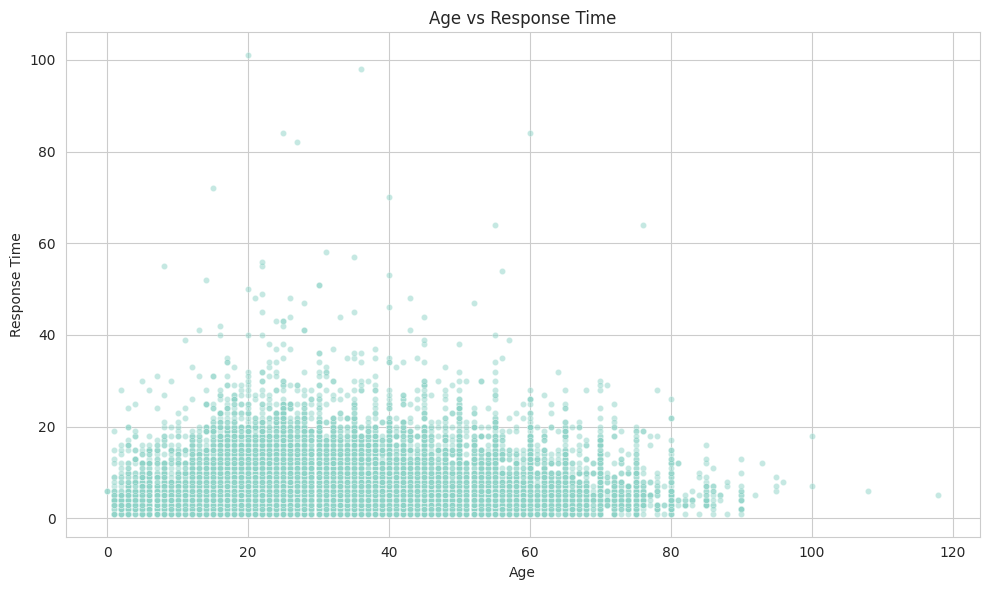

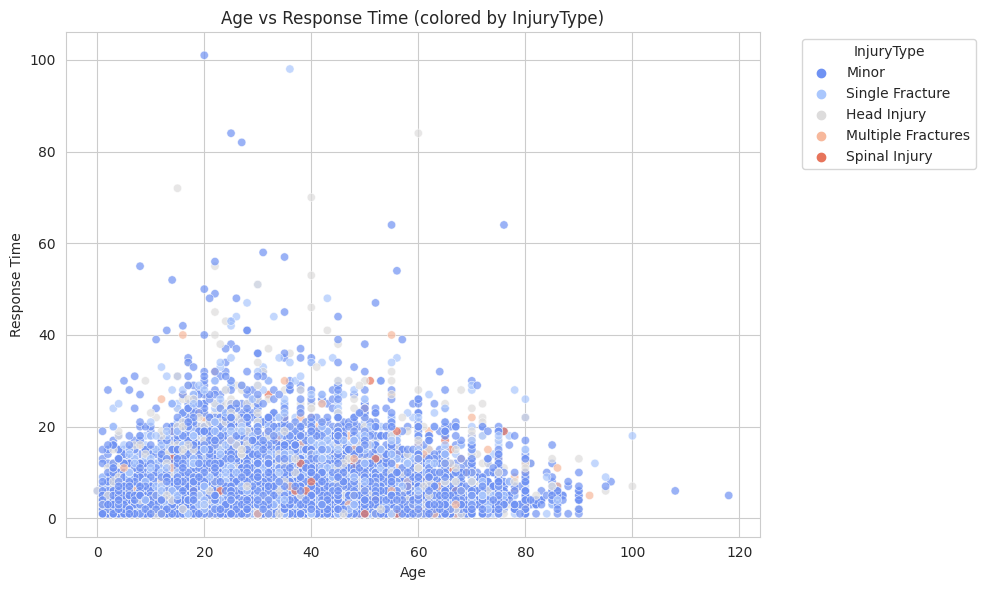

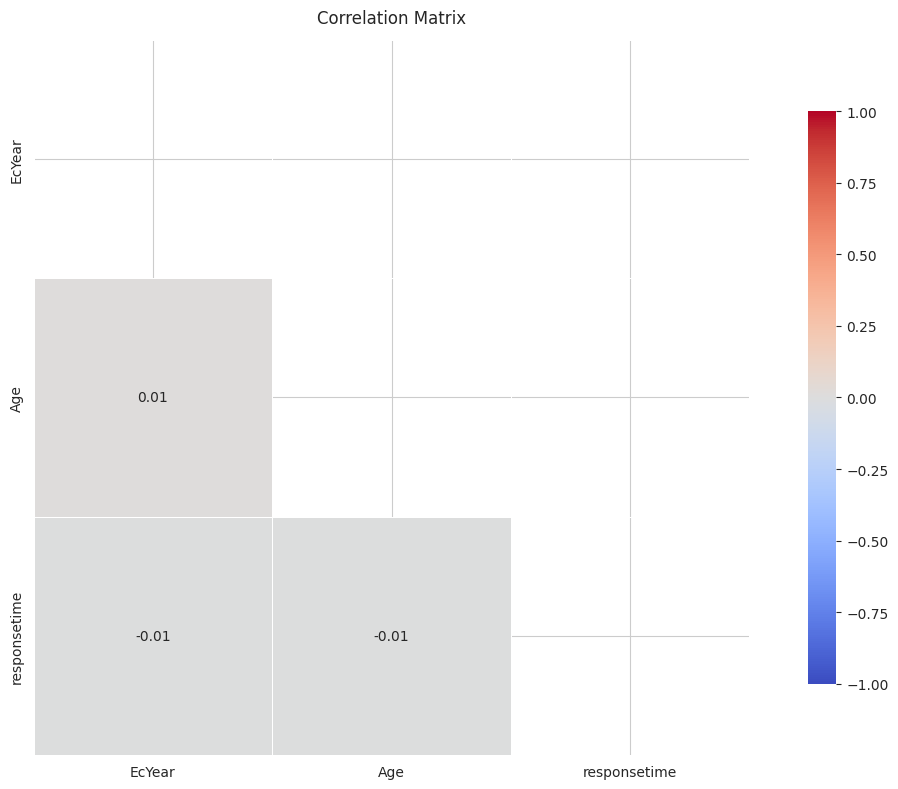

In [27]:
# Scatter plot for Age vs Response Time
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.scatterplot(x='Age', y='responsetime', data=df_cleaned, s=20, alpha=0.5)
plt.title('Age vs Response Time')
plt.xlabel('Age')
plt.ylabel('Response Time')
plt.tight_layout()
plt.show()

# Scatter plot for Age vs Response Time colored by InjuryType
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='responsetime', hue='InjuryType', data=df_cleaned, 
                palette='coolwarm', alpha=0.7)
plt.title('Age vs Response Time (colored by InjuryType)')
plt.xlabel('Age')
plt.ylabel('Response Time')
plt.legend(title='InjuryType', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
numerical_data = df_cleaned.select_dtypes(include=['float64', 'int64']).dropna()
corr_matrix = numerical_data.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, vmin=-1, vmax=1, 
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix', pad=12)
plt.tight_layout()
plt.show()

**5.2.2. Numerical vs Categorical**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


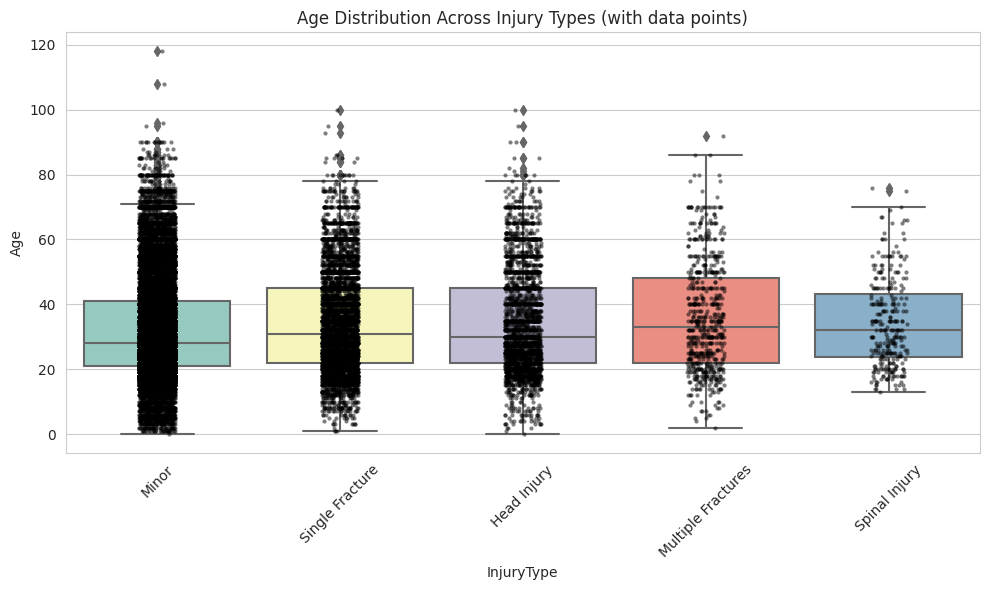

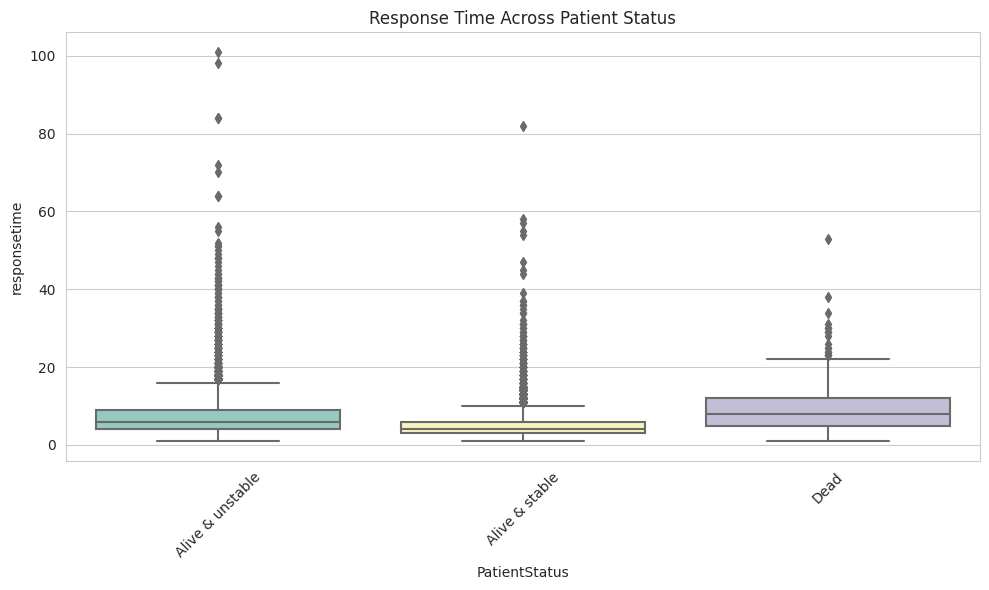

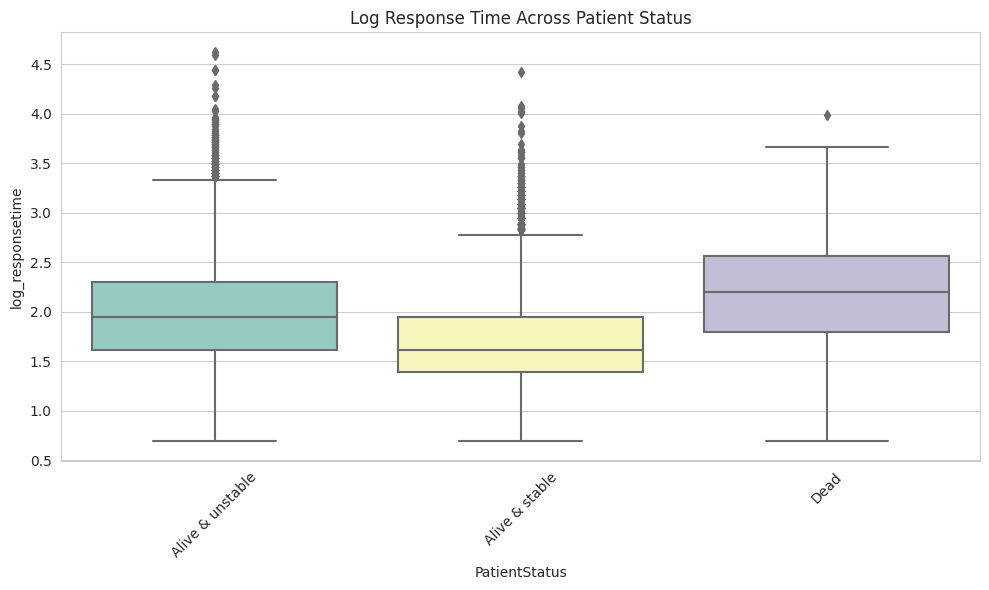

In [28]:
# Boxplot for Age across Injury Types
plt.figure(figsize=(10, 6))
sns.boxplot(x='InjuryType', y='Age', data=df_cleaned, showfliers=True)
sns.stripplot(x='InjuryType', y='Age', data=df_cleaned, color='black', size=3, alpha=0.5)  # Overlay individual points
plt.xticks(rotation=45)
plt.title('Age Distribution Across Injury Types (with data points)')
plt.tight_layout()
plt.show()

# Boxplot for Response Time across Patient Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='PatientStatus', y='responsetime', data=df_cleaned, showfliers=True)
plt.xticks(rotation=45)
plt.title('Response Time Across Patient Status')
plt.tight_layout()
plt.show()

# Log transformation of Response Time to handle skewness
df_cleaned['log_responsetime'] = np.log1p(df_cleaned['responsetime'])  # Log transformation to reduce skewness

# Boxplot for log-transformed Response Time across Patient Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='PatientStatus', y='log_responsetime', data=df_cleaned, showfliers=True)
plt.xticks(rotation=45)
plt.title('Log Response Time Across Patient Status')
plt.tight_layout()
plt.show()

**5.2.3. Categorical vs Categorical**

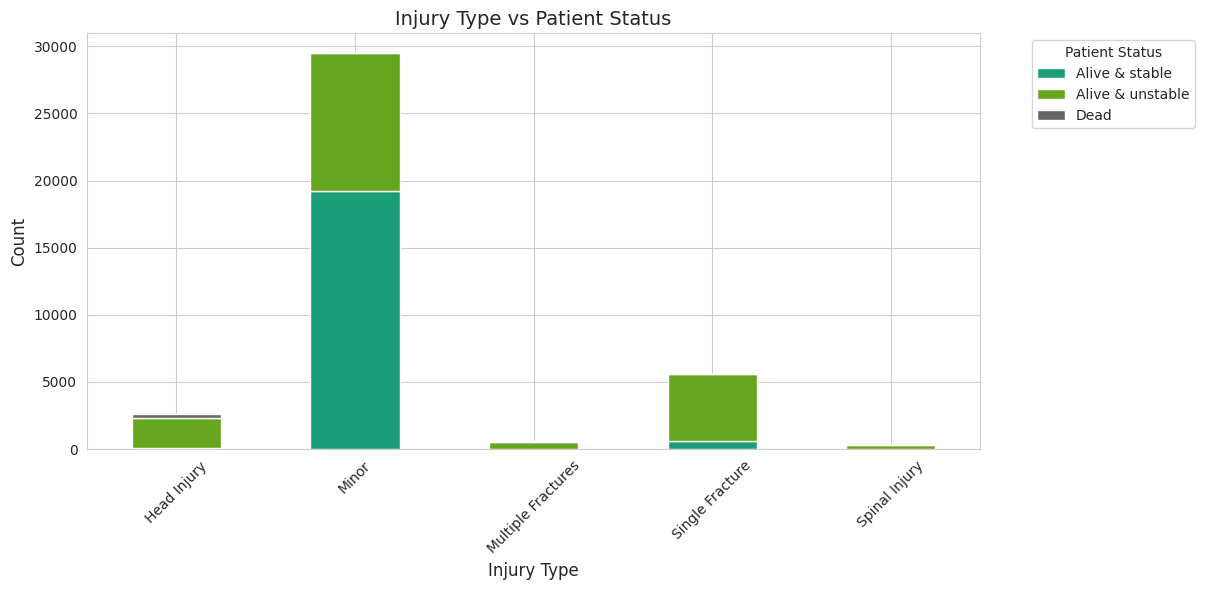

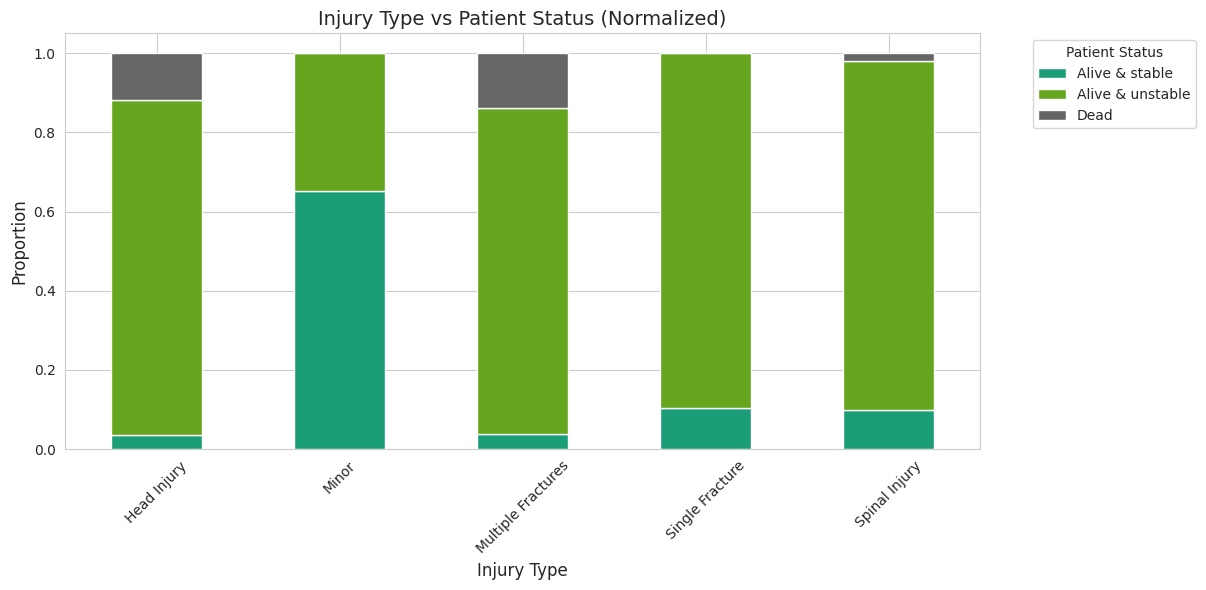

In [32]:
# Crosstab between Injury Type and Patient Status (Stacked Bar Plot)
crosstab_data = pd.crosstab(df_cleaned['InjuryType'], df_cleaned['PatientStatus'])

# Plot the stacked bar chart
crosstab_data.plot(kind='bar', stacked=True, colormap='Dark2', figsize=(10, 6))

# Customizing the plot
plt.title('Injury Type vs Patient Status', fontsize=14)
plt.xlabel('Injury Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Patient Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Normalized Crosstab (Percentage Plot)
crosstab_data_normalized = pd.crosstab(df_cleaned['InjuryType'], df_cleaned['PatientStatus'], normalize='index')
crosstab_data_normalized.plot(kind='bar', stacked=True, colormap='Dark2', figsize=(10, 6))

# Customizing the plot
plt.title('Injury Type vs Patient Status (Normalized)', fontsize=14)
plt.xlabel('Injury Type', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Patient Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**5.3. Multivariate Analysis**

**5.3.1. Pair Plots for Numerical Variables**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

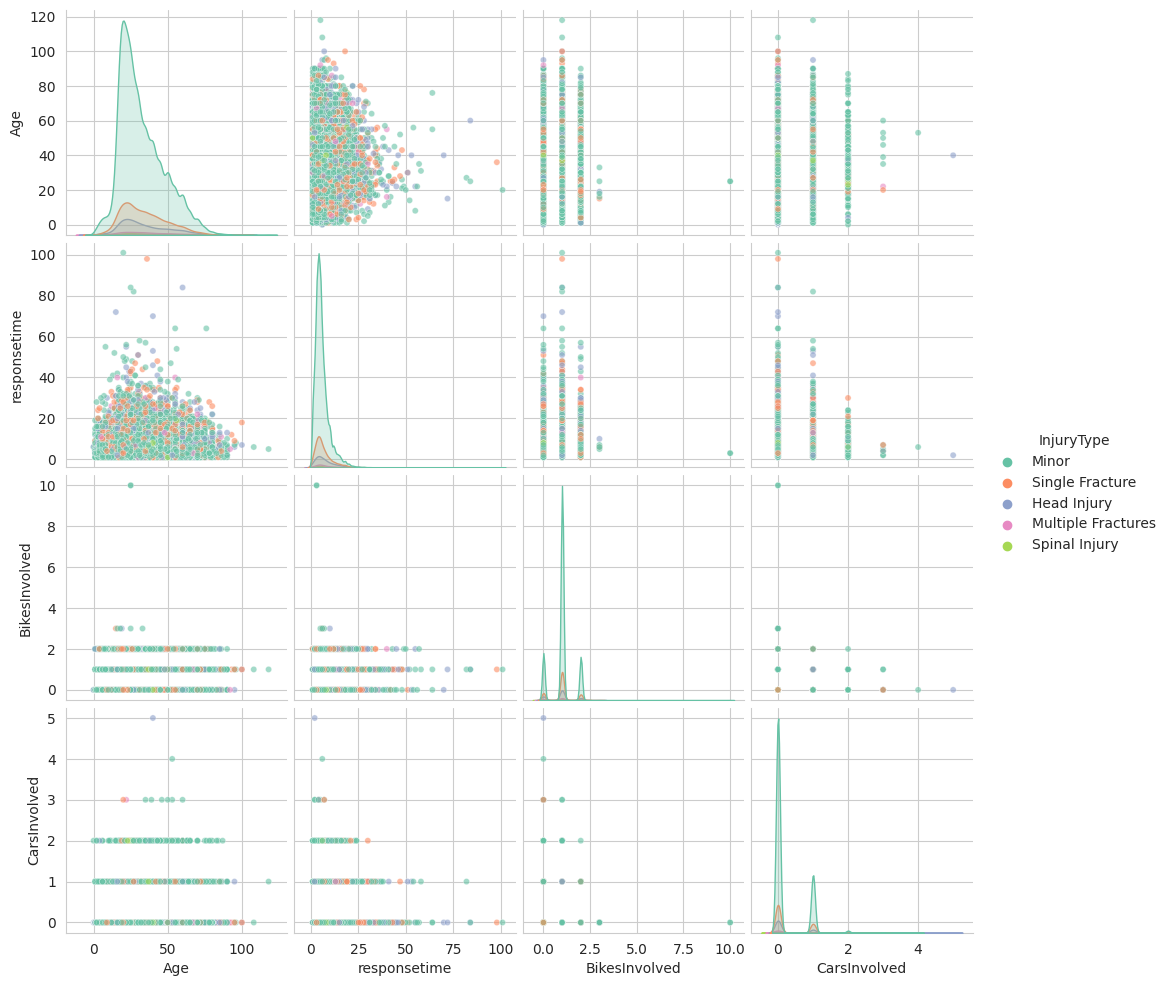

In [31]:
# Filter only numeric columns and ensure no non-numeric data
numerical_vars = ['Age', 'responsetime', 'BikesInvolved', 'CarsInvolved']
df_numeric = df_cleaned[numerical_vars].apply(pd.to_numeric, errors='coerce').dropna()

# Check if InjuryType is categorical
if 'InjuryType' in df_cleaned.columns:
    df_numeric['InjuryType'] = df_cleaned['InjuryType']

# Improve the color palette and aesthetics
# Use a palette like 'Set2' for better contrast
sns.set_style('whitegrid')
sns.set_palette('Set2')

# Pair Plot for Numerical Variables
sns.pairplot(df_numeric, vars=numerical_vars, diag_kind='kde', hue='InjuryType', 
             palette='Set2', plot_kws={'alpha': 0.6, 's': 20})

plt.show()

**5.3.2. Heatmap for Correlations**

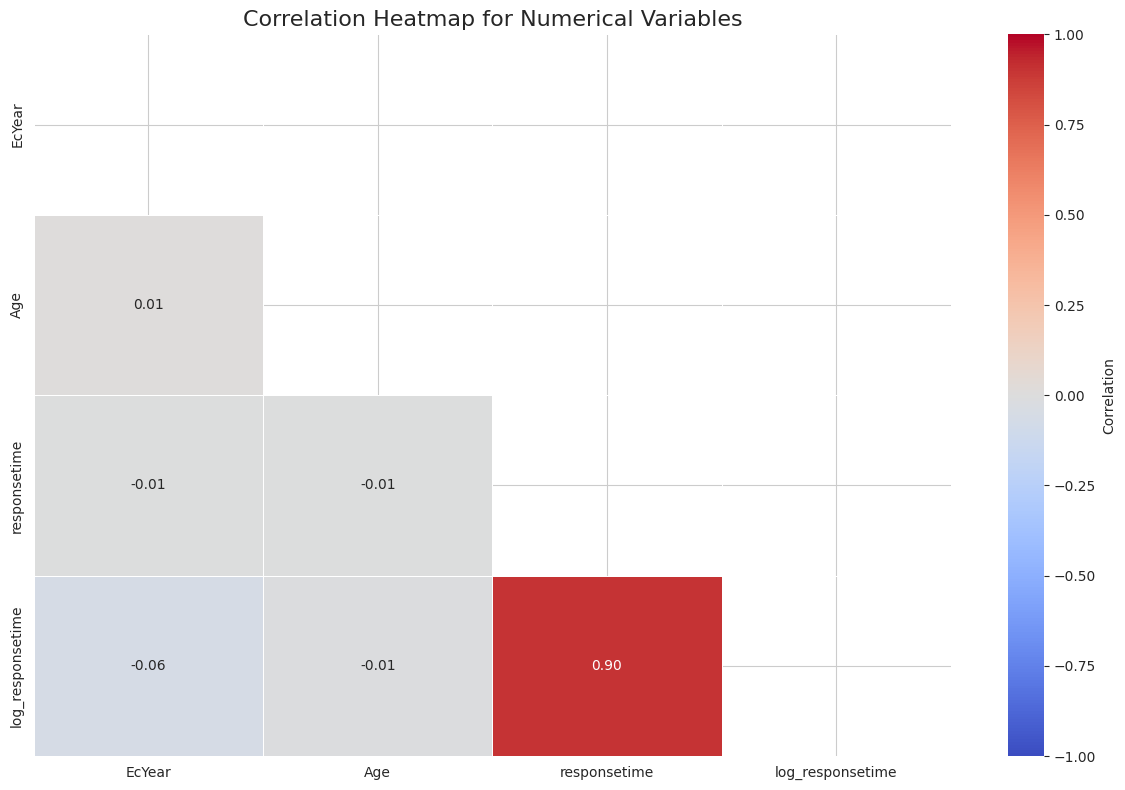

In [33]:
# Select only numerical columns for the correlation matrix
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).dropna()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(numerical_cols.corr(), dtype=bool))

# Create a figure and heatmap
plt.figure(figsize=(12, 8))

# Correlation matrix heatmap with masking, better annotation format, and color range
sns.heatmap(numerical_cols.corr(), mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, cbar_kws={"label": "Correlation"})

# Add title and display the plot
plt.title('Correlation Heatmap for Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

**5.4. Deeper Insights into Injury Type and Patient Status**

**5.4.1. Relationship Between Injury Type and Other Variables**

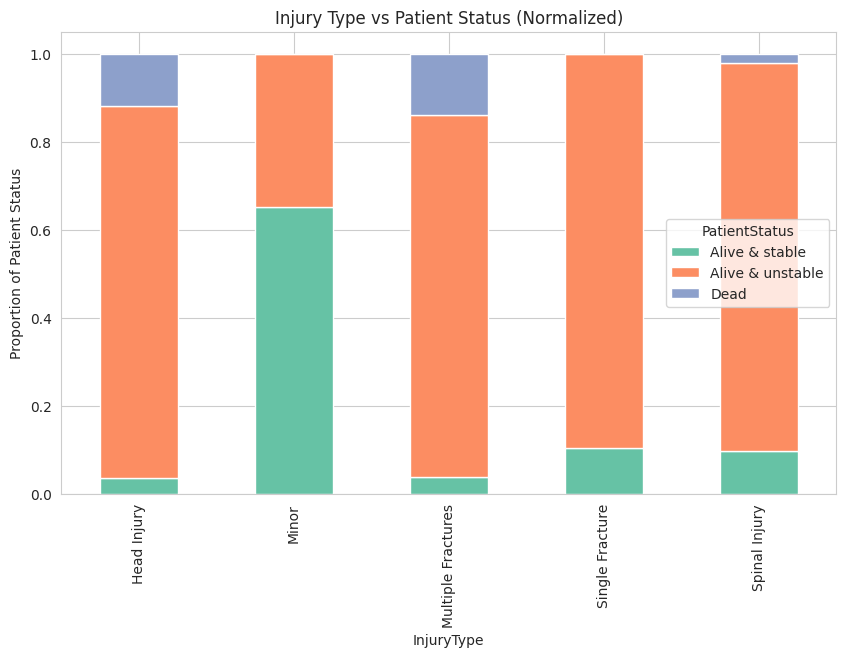

In [34]:
# Crosstab between Injury Type and Patient Status with proportions
injury_status_ct = pd.crosstab(df_cleaned['InjuryType'], df_cleaned['PatientStatus'], normalize='index')
injury_status_ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Injury Type vs Patient Status (Normalized)')
plt.ylabel('Proportion of Patient Status')
plt.show()

**5.4.2. Injury Type vs Other Categorical Variables**

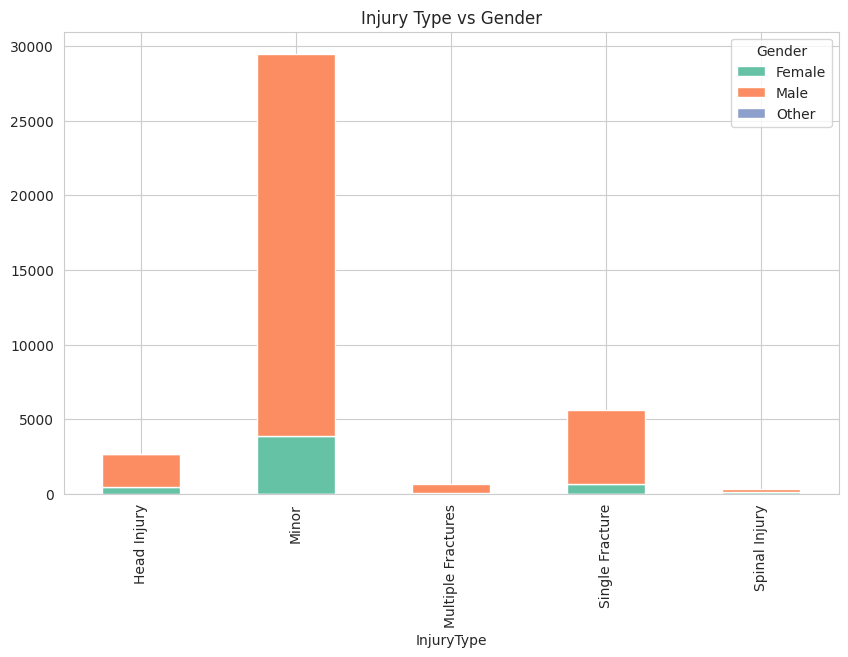

In [35]:
# Crosstab between Injury Type and Gender
injury_gender_ct = pd.crosstab(df_cleaned['InjuryType'], df_cleaned['Gender'])
injury_gender_ct.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Injury Type vs Gender')
plt.show()

**5.4.3. Temporal Analysis Based on Injury Type**

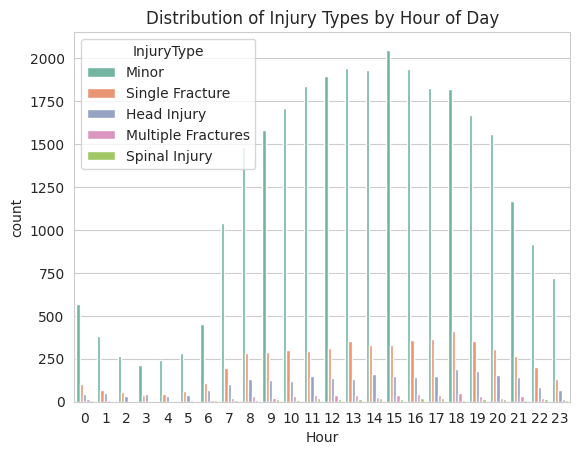

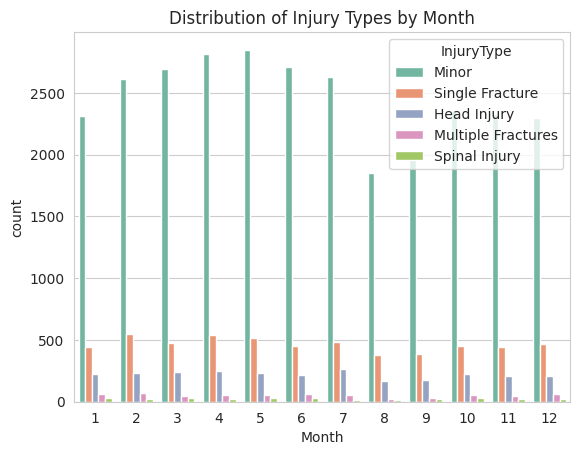

In [36]:
# Incidents by Hour of Day and Injury Type
sns.countplot(x='Hour', hue='InjuryType', data=df_cleaned)
plt.title('Distribution of Injury Types by Hour of Day')
plt.show()

# Incidents by Month and Injury Type
sns.countplot(x='Month', hue='InjuryType', data=df_cleaned)
plt.title('Distribution of Injury Types by Month')
plt.show()

**5.5. Pairing Categorical and Numerical Variables**

**5.5.1. Numerical Summary Based on Injury Type**

In [37]:
# Summary statistics for Age and Response Time by Injury Type
summary_stats = df_cleaned.groupby('InjuryType')[['Age', 'responsetime']].describe()
print(summary_stats)

                        Age                                                  \
                      count       mean        std   min    25%   50%    75%   
InjuryType                                                                    
Head Injury          2640.0  34.350758  16.201942   0.0  22.00  30.0  45.00   
Minor               29490.0  32.269278  15.029692   0.0  21.00  28.0  41.00   
Multiple Fractures    622.0  35.924437  16.953638   2.0  22.00  33.0  48.00   
Single Fracture      5586.0  34.003043  15.247683   1.0  22.00  31.0  45.00   
Spinal Injury         296.0  34.172297  13.584414  13.0  23.75  32.0  43.25   

                          responsetime                                     \
                      max        count      mean       std  min  25%  50%   
InjuryType                                                                  
Head Injury         100.0       2640.0  7.807197  6.471697  1.0  4.0  6.0   
Minor               118.0      29490.0  5.737641  4.206734 

**5.5.2. Boxplots for Multivariate Relationships**

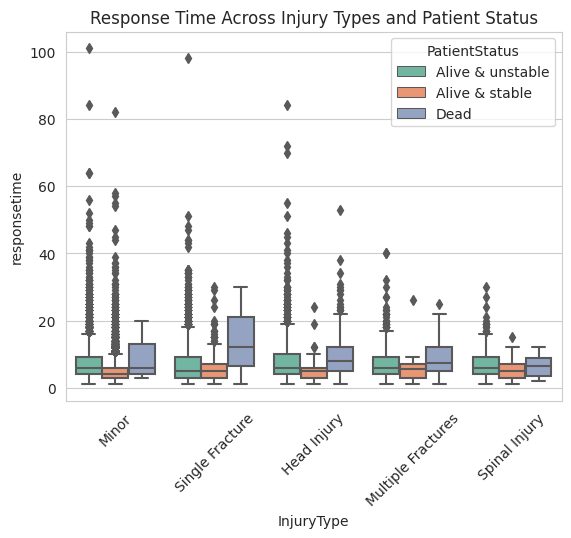

In [38]:
# Boxplot for Response Time across Injury Type, with Hue as Patient Status
sns.boxplot(x='InjuryType', y='responsetime', hue='PatientStatus', data=df_cleaned)
plt.xticks(rotation=45)
plt.title('Response Time Across Injury Types and Patient Status')
plt.show()

**5.6. Exploring Correlations with Focus on Patient Outcomes**

**5.6.1. Encoding Categorical Variables**

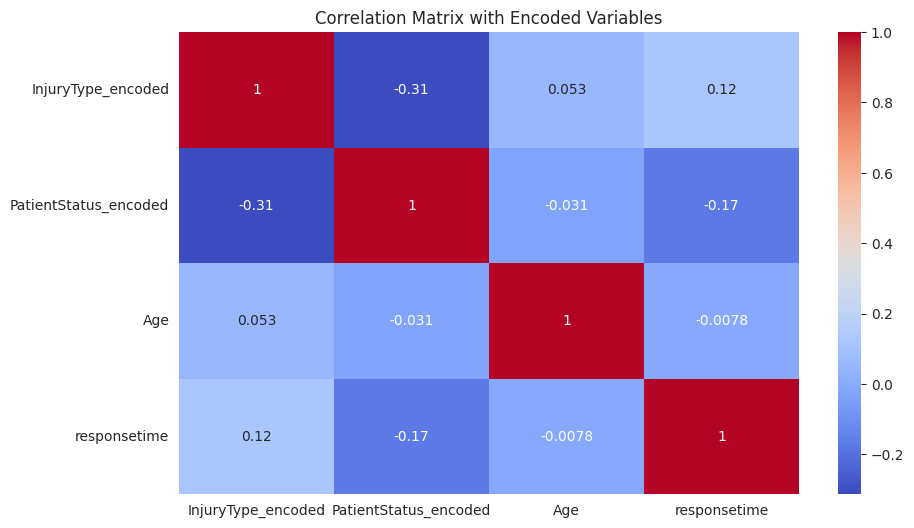

In [39]:
# Encode Injury Type and Patient Status
df_encoded = df_cleaned.copy()
df_encoded['InjuryType_encoded'] = df_encoded['InjuryType'].factorize()[0]
df_encoded['PatientStatus_encoded'] = df_encoded['PatientStatus'].factorize()[0]

# Correlation matrix with encoded Injury Type and Patient Status
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded[['InjuryType_encoded', 'PatientStatus_encoded', 'Age', 'responsetime']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Encoded Variables')
plt.show()

**5.7. Explore Additional Categorical Variables' Impact on Patient Status and Injury Type**

**5.7.1. Crosstab Analysis for Other Categorical Variables**

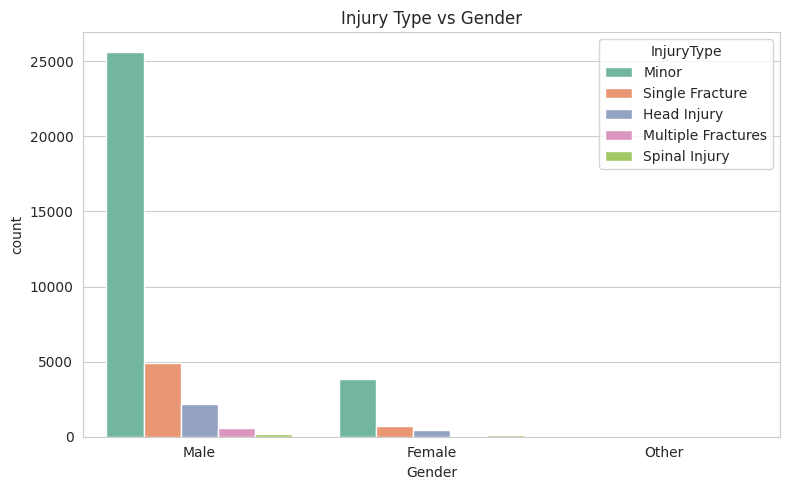

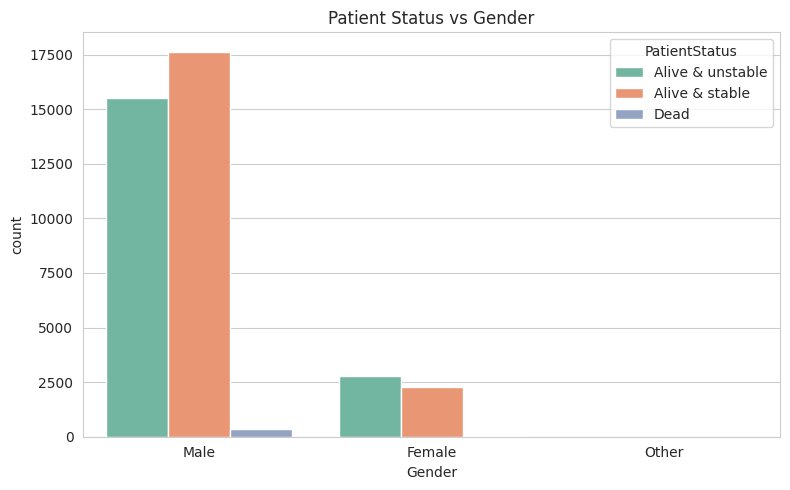

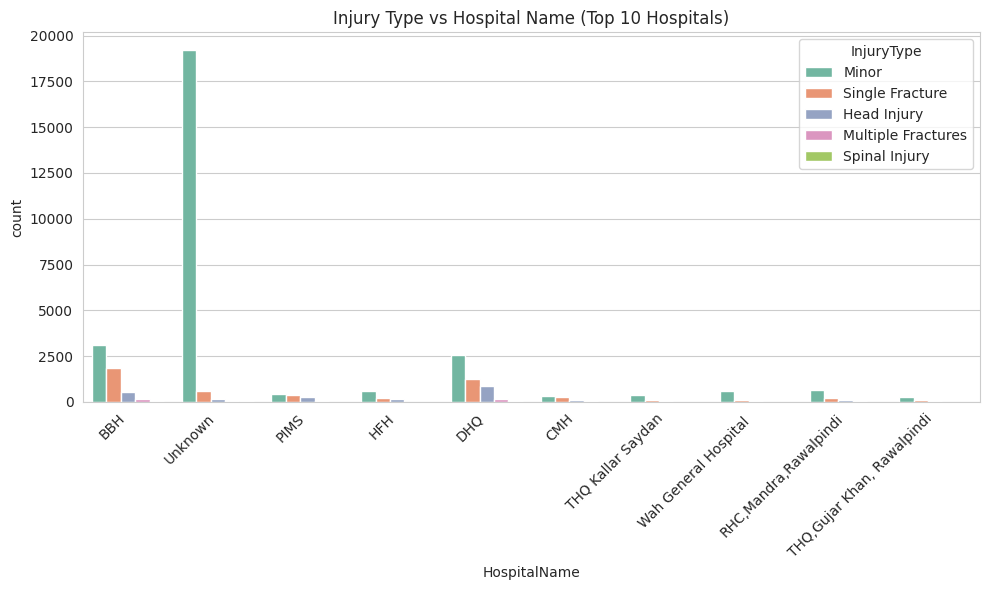

In [41]:
# Crosstab between InjuryType and Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='InjuryType', data=df_cleaned)
plt.title('Injury Type vs Gender')
plt.tight_layout()
plt.show()

# Crosstab between Patient Status and Gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='PatientStatus', data=df_cleaned)
plt.title('Patient Status vs Gender')
plt.tight_layout()
plt.show()

# Crosstab between InjuryType and Hospital (Top 10 Hospitals by frequency)
top_hospitals = df_cleaned['HospitalName'].value_counts().nlargest(10).index
df_filtered = df_cleaned[df_cleaned['HospitalName'].isin(top_hospitals)]

plt.figure(figsize=(10, 6))
sns.countplot(x='HospitalName', hue='InjuryType', data=df_filtered)
plt.title('Injury Type vs Hospital Name (Top 10 Hospitals)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**5.8. Advanced Correlation Analysis Between Features**

**5.8.1. Feature Importance or Correlation Heatmap with Encoded Variables**

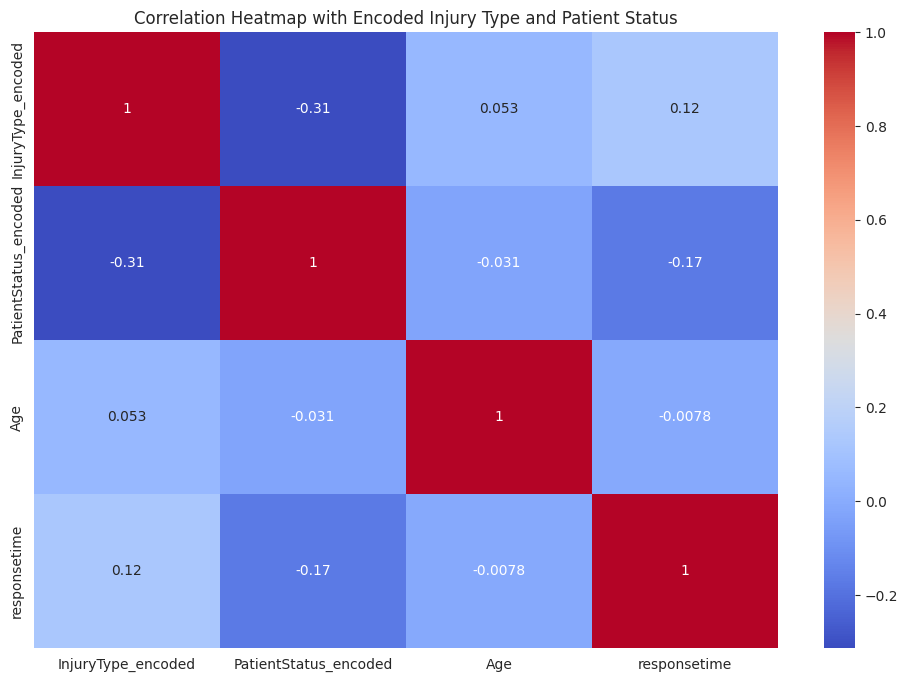

In [42]:
# Encoding categorical columns to numerical for better correlation analysis
df_encoded['InjuryType_encoded'] = df_encoded['InjuryType'].factorize()[0]
df_encoded['PatientStatus_encoded'] = df_encoded['PatientStatus'].factorize()[0]

# Correlation matrix with encoded variables
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded[['InjuryType_encoded', 'PatientStatus_encoded', 'Age', 'responsetime']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Encoded Injury Type and Patient Status')
plt.show()

**5.9. Temporal Analysis: Seasonal and Hourly Trends**

**5.9.1. Temporal Trends in Injury Type**

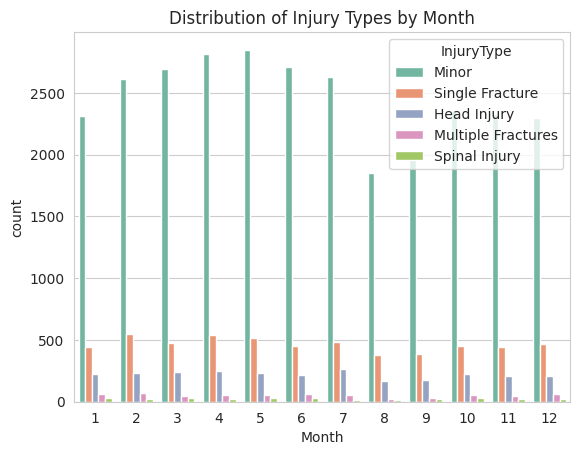

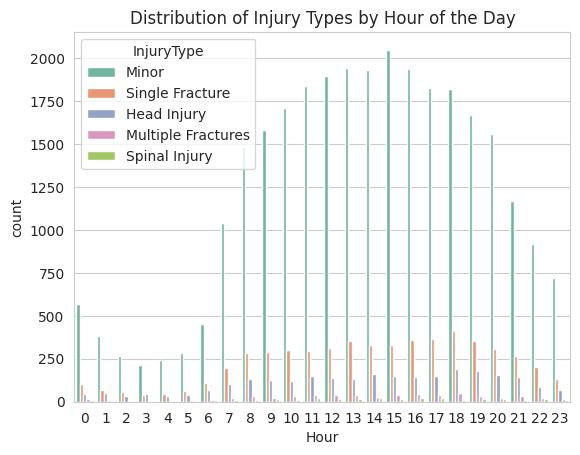

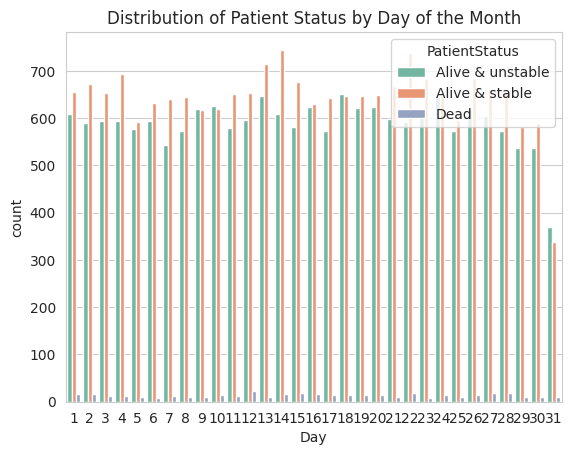

In [43]:
# Incidents by Month and Injury Type
sns.countplot(x='Month', hue='InjuryType', data=df_cleaned)
plt.title('Distribution of Injury Types by Month')
plt.show()

# Incidents by Hour and Injury Type
sns.countplot(x='Hour', hue='InjuryType', data=df_cleaned)
plt.title('Distribution of Injury Types by Hour of the Day')
plt.show()

# Incidents by Day and Patient Status
sns.countplot(x='Day', hue='PatientStatus', data=df_cleaned)
plt.title('Distribution of Patient Status by Day of the Month')
plt.show()

**5.10. Vehicle Involvement and Its Impact on Injury and Patient Status**

**5.10.1. Explore the Influence of Different Vehicle Involvements**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na

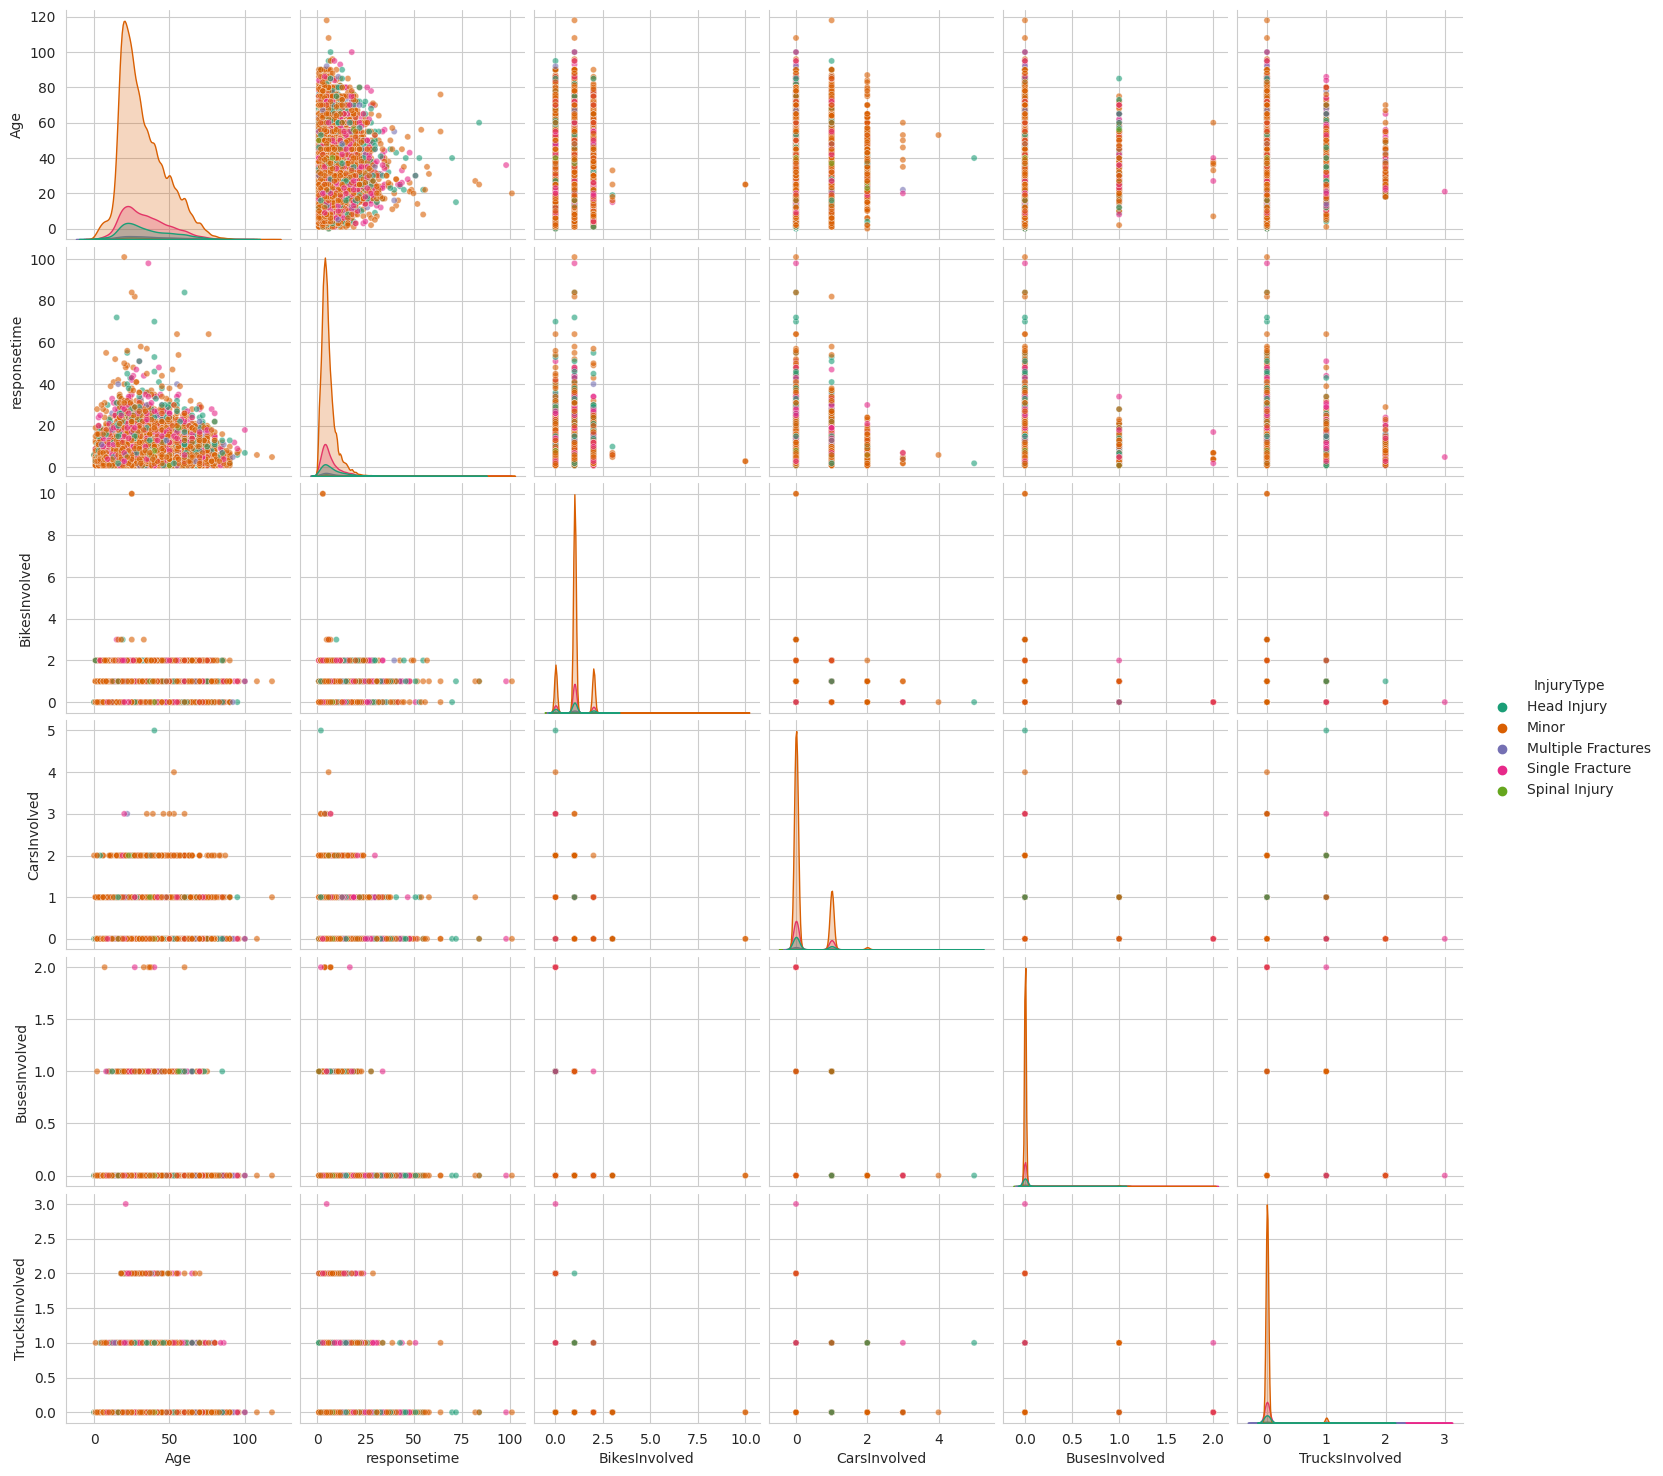

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))


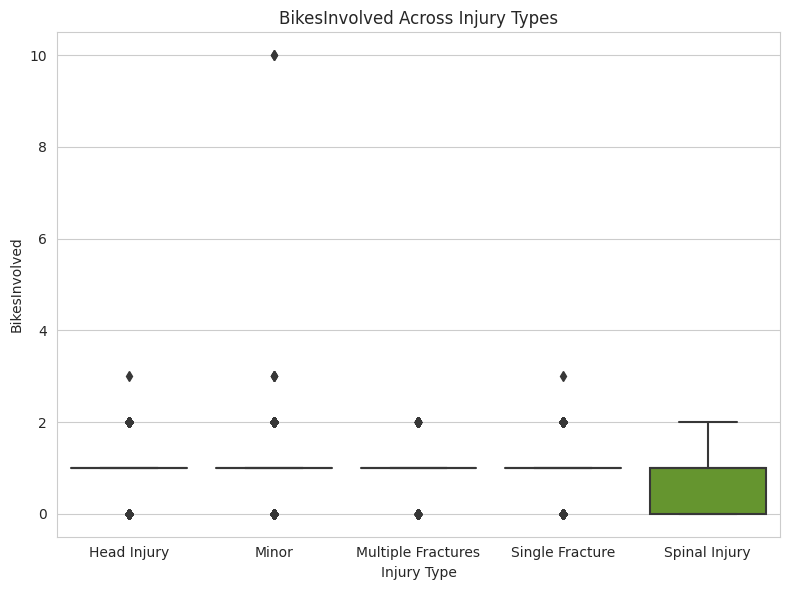

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))


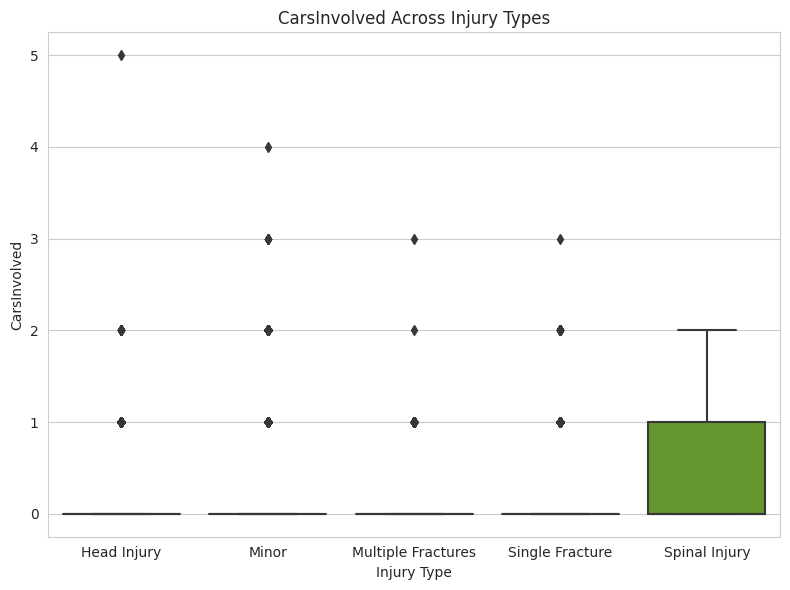

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))


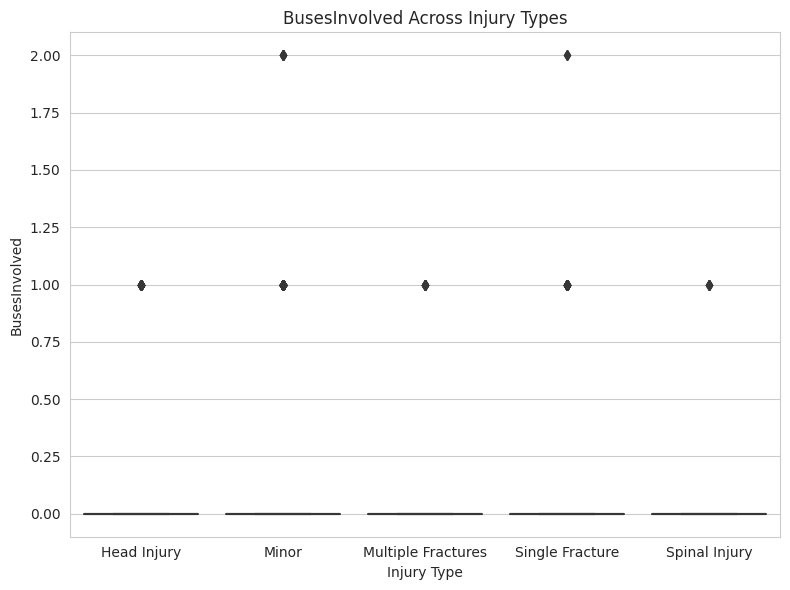

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))


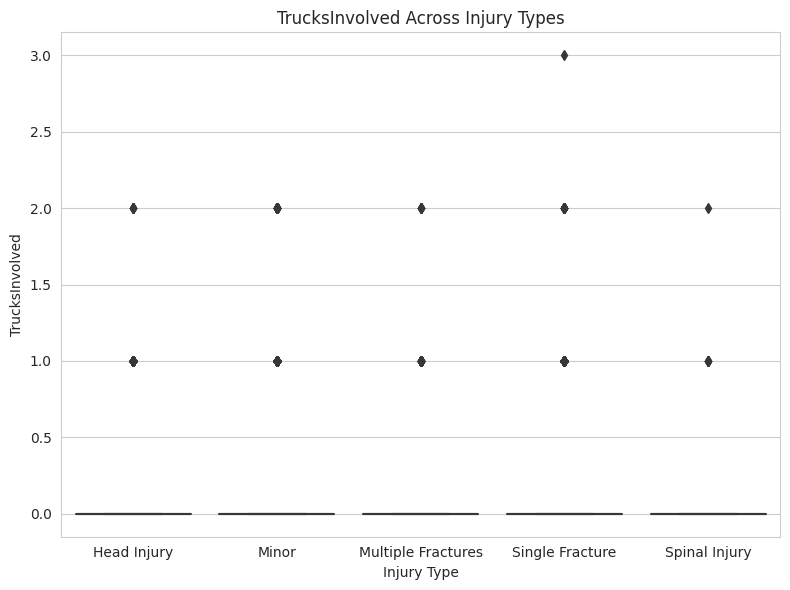

In [45]:
# Ensure necessary columns are numeric
numeric_cols = ['BikesInvolved', 'CarsInvolved', 'BusesInvolved', 'TrucksInvolved', 'Age', 'responsetime']
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Convert 'InjuryType' to categorical
df_cleaned['InjuryType'] = df_cleaned['InjuryType'].astype('category')

# Drop rows with missing values in the relevant columns
df_cleaned.dropna(subset=numeric_cols, inplace=True)

# Generate the pair plot
sns.set_style('whitegrid')
sns.set_palette('Dark2')
sns.pairplot(
    df_cleaned,
    vars=['Age', 'responsetime', 'BikesInvolved', 'CarsInvolved', 'BusesInvolved', 'TrucksInvolved'],
    hue='InjuryType',
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 20}
)
plt.show()

# Generate boxplots for vehicle involvement across injury types
vehicle_involvement_cols = ['BikesInvolved', 'CarsInvolved', 'BusesInvolved', 'TrucksInvolved']

for col in vehicle_involvement_cols:
    if col in df_cleaned.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(
            x='InjuryType',
            y=col,
            data=df_cleaned,
            dodge=False
        )
        plt.title(f'{col} Across Injury Types')
        plt.xlabel('Injury Type')
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()

**Phase 2**

**5.11. Split the Dataset into Train, Validation, and Test Sets**

In [46]:
# Split the dataset into 60% training and 40% temporary data
train_set, temp_set = train_test_split(df, test_size=0.4, random_state=42)

# Split the temporary set into 20% validation and 20% test
validation_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

# Confirm the sizes of each set
print(f"Training Set Size: {len(train_set)}")
print(f"Validation Set Size: {len(validation_set)}")
print(f"Test Set Size: {len(test_set)}")

Training Set Size: 27713
Validation Set Size: 9238
Test Set Size: 9238


**5.12. Data Processing**

**5.12.1. Handle Missing Values**

In [57]:
# Identify numerical and categorical columns
numeric_cols = train_set.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_set.select_dtypes(include=['object', 'category']).columns.tolist()

# Identify columns not included in imputation
all_cols = train_set.columns.tolist()
imputed_cols = numeric_cols + categorical_cols
remaining_cols = list(set(all_cols) - set(imputed_cols))
print("\nColumns not included in imputation:", remaining_cols)

# Handle datetime columns separately if any
datetime_cols = [col for col in remaining_cols if np.issubdtype(train_set[col].dtype, np.datetime64)]
other_cols = list(set(remaining_cols) - set(datetime_cols))

# Impute datetime columns without using inplace=True
for col in datetime_cols:
    # Fill missing values in each set with the mode of the training set for consistency
    mode_datetime = train_set[col].mode()[0]
    train_set[col] = train_set[col].fillna(mode_datetime)
    validation_set[col] = validation_set[col].fillna(mode_datetime)
    test_set[col] = test_set[col].fillna(mode_datetime)

# Add other remaining columns to categorical_cols
categorical_cols.extend(other_cols)

# Initialize imputers
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the training set
train_set[numeric_cols] = numeric_imputer.fit_transform(train_set[numeric_cols])
train_set[categorical_cols] = categorical_imputer.fit_transform(train_set[categorical_cols])

# Apply transformations to validation and test sets
validation_set[numeric_cols] = numeric_imputer.transform(validation_set[numeric_cols])
validation_set[categorical_cols] = categorical_imputer.transform(validation_set[categorical_cols])
test_set[numeric_cols] = numeric_imputer.transform(test_set[numeric_cols])
test_set[categorical_cols] = categorical_imputer.transform(test_set[categorical_cols])

# Verify missing values
print("\nTotal missing values after imputation:")
print("Training Set:", train_set.isnull().sum().sum())
print("Validation Set:", validation_set.isnull().sum().sum())
print("Test Set:", test_set.isnull().sum().sum())


Columns not included in imputation: []

Total missing values after imputation:
Training Set: 0
Validation Set: 0
Test Set: 0


**5.12.2. Handle Outliers**

In [58]:
# Calculate IQR and bounds from the training set
def calculate_outlier_bounds(df, columns):
    bounds = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        bounds[col] = (lower_bound, upper_bound)
    return bounds

# Get bounds from the training set
outlier_bounds = calculate_outlier_bounds(train_set, numeric_cols)

# Function to apply clipping based on calculated bounds
def clip_outliers(df, bounds):
    for col, (lower, upper) in bounds.items():
        df[col] = df[col].clip(lower=lower, upper=upper)

# Apply clipping to all datasets
clip_outliers(train_set, outlier_bounds)
clip_outliers(validation_set, outlier_bounds)
clip_outliers(test_set, outlier_bounds)

**5.12.3. Feature Engineering**

In [59]:
# Extracting features from 'CallTime' column if it exists in the dataset
if 'CallTime' in train_set.columns:
    for dataset in [train_set, validation_set, test_set]:
        dataset['Year'] = pd.to_datetime(dataset['CallTime']).dt.year
        dataset['Month'] = pd.to_datetime(dataset['CallTime']).dt.month
        dataset['Day'] = pd.to_datetime(dataset['CallTime']).dt.day
        dataset['Hour'] = pd.to_datetime(dataset['CallTime']).dt.hour
    # Drop the original 'CallTime' column to prevent redundancy
    train_set.drop(columns=['CallTime'], inplace=True)
    validation_set.drop(columns=['CallTime'], inplace=True)
    test_set.drop(columns=['CallTime'], inplace=True)

**5.12.4. Handle Duplicate Rows**

In [60]:
# Remove duplicate rows in each dataset
train_set = train_set.drop_duplicates()
validation_set = validation_set.drop_duplicates()
test_set = test_set.drop_duplicates()

**5.12.5. Handle Text Features**

In [61]:
# Define synonym mapping
synonym_mapping = {
    'bike slipped': 'bike slip',
    'bike slip': 'bike slip',
    'same': 'unknown',
    'car hit the bike and runaway': 'car hit bike and runaway',
    'bike hit the pedestrian and runaway': 'bike hit pedestrian and runaway',
    'bike hit pedistarian': 'bike hit pedestrian',
    'two bikes collieds': 'two bikes collided',
    '.': 'unknown'
}

# Apply text processing on 'Reason' in each dataset
for dataset in [train_set, validation_set, test_set]:
    # Ensure 'Reason' column exists
    if 'Reason' in dataset.columns:
        # Basic text cleaning
        dataset['Reason'] = (
            dataset['Reason']
            .str.lower()
            .str.replace('[^\w\s]', '', regex=True)
            .str.strip()
        )
        # Replace synonyms
        dataset['Reason'] = dataset['Reason'].replace(synonym_mapping)

**5.12.6. Group Rare Categories Before Encoding**

In [62]:
# Re-identify categorical columns excluding target variables and 'CallTime'
categorical_cols = train_set.select_dtypes(include=['object', 'category', 'string']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in ['InjuryType', 'PatientStatus', 'CallTime']]

print(f"Categorical Columns after re-identification: {categorical_cols}")

# Convert all categorical columns to strings to avoid mixed data type issues
for col in categorical_cols:
    train_set[col] = train_set[col].astype(str)
    validation_set[col] = validation_set[col].astype(str)
    test_set[col] = test_set[col].astype(str)

# Define a threshold for rare categories (e.g., categories appearing less than 1% of the time)
threshold = 0.01  # 1%

# Create a dictionary to store mappings for each column
rare_category_mappings = {}

# Identify rare categories in the training set and create a mapping
for col in categorical_cols:
    freq = train_set[col].value_counts(normalize=True)
    rare_categories = freq[freq < threshold].index.tolist()
    rare_category_mappings[col] = rare_categories
    # Replace rare categories in the training set with 'Other'
    train_set[col] = train_set[col].replace(rare_categories, 'Other')

# Apply the mapping to the validation and test sets
for col in categorical_cols:
    # Replace rare categories in validation and test sets with 'Other'
    validation_set[col] = validation_set[col].replace(rare_category_mappings[col], 'Other')
    test_set[col] = test_set[col].replace(rare_category_mappings[col], 'Other')
    # Replace categories not seen in training set with 'Other'
    known_categories = train_set[col].unique()
    validation_set[col] = validation_set[col].apply(lambda x: x if x in known_categories else 'Other')
    test_set[col] = test_set[col].apply(lambda x: x if x in known_categories else 'Other')

Categorical Columns after re-identification: ['EcYear', 'EcNumber', 'EmergencyArea', 'TotalPatientsInEmergency', 'Gender', 'HospitalName', 'Reason', 'EducationTitle', 'Cause']


**5.12.7. One Hot Encode Categorical Variables, Excluding Target Variables**

In [63]:
# Exclude target variables from categorical columns
categorical_cols = [col for col in categorical_cols if col not in ['InjuryType', 'PatientStatus']]

# Convert all categorical columns to strings to avoid mixed data type issues
for col in categorical_cols:
    train_set[col] = train_set[col].astype(str)
    validation_set[col] = validation_set[col].astype(str)
    test_set[col] = test_set[col].astype(str)

# One-hot encoding of categorical columns
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Fit and transform training data, then apply to validation and test sets
train_encoded = onehot_encoder.fit_transform(train_set[categorical_cols])
validation_encoded = onehot_encoder.transform(validation_set[categorical_cols])
test_encoded = onehot_encoder.transform(test_set[categorical_cols])

# Assign column names to encoded features
encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_cols)
train_encoded_df = pd.DataFrame(train_encoded, columns=encoded_feature_names)
validation_encoded_df = pd.DataFrame(validation_encoded, columns=encoded_feature_names)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoded_feature_names)

# Reset the index to prepare for concatenation
train_encoded_df.reset_index(drop=True, inplace=True)
validation_encoded_df.reset_index(drop=True, inplace=True)
test_encoded_df.reset_index(drop=True, inplace=True)

# Drop the original categorical columns (excluding target variables) and concatenate the new encoded features
train_set = pd.concat([train_set.drop(columns=categorical_cols).reset_index(drop=True), train_encoded_df], axis=1)
validation_set = pd.concat([validation_set.drop(columns=categorical_cols).reset_index(drop=True), validation_encoded_df], axis=1)
test_set = pd.concat([test_set.drop(columns=categorical_cols).reset_index(drop=True), test_encoded_df], axis=1)

print(f"Number of features after encoding: {train_set.shape[1]}")

Number of features after encoding: 55


**5.12.8. Feature Scaling**

In [64]:
# Identify numerical columns (excluding target variables and one-hot encoded features)
numeric_cols_after_encoding = train_set.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols_after_encoding = [col for col in numeric_cols_after_encoding if col not in ['InjuryType', 'PatientStatus']]

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training set only
scaler.fit(train_set[numeric_cols_after_encoding])

# Transform the training, validation, and test sets
train_set[numeric_cols_after_encoding] = scaler.transform(train_set[numeric_cols_after_encoding])
validation_set[numeric_cols_after_encoding] = scaler.transform(validation_set[numeric_cols_after_encoding])
test_set[numeric_cols_after_encoding] = scaler.transform(test_set[numeric_cols_after_encoding])

**5.12.9. Label Encode Target Variables**

In [65]:
# Create copies to avoid modifying the original data
train_set_encoded = train_set.copy()
validation_set_encoded = validation_set.copy()
test_set_encoded = test_set.copy()

# Initialize LabelEncoders
label_encoder_injury = LabelEncoder()
label_encoder_status = LabelEncoder()

# Encode 'InjuryType'
train_set_encoded['InjuryType'] = label_encoder_injury.fit_transform(train_set_encoded['InjuryType'])
validation_set_encoded['InjuryType'] = label_encoder_injury.transform(validation_set_encoded['InjuryType'])
test_set_encoded['InjuryType'] = label_encoder_injury.transform(test_set_encoded['InjuryType'])

# Encode 'PatientStatus'
train_set_encoded['PatientStatus'] = label_encoder_status.fit_transform(train_set_encoded['PatientStatus'])
validation_set_encoded['PatientStatus'] = label_encoder_status.transform(validation_set_encoded['PatientStatus'])
test_set_encoded['PatientStatus'] = label_encoder_status.transform(test_set_encoded['PatientStatus'])

# View the mapping
print("InjuryType Classes:", label_encoder_injury.classes_)
print("PatientStatus Classes:", label_encoder_status.classes_)

InjuryType Classes: ['Head Injury' 'Minor' 'Multiple Fractures' 'Single Fracture'
 'Spinal Injury']
PatientStatus Classes: ['Alive & stable' 'Alive & unstable' 'Dead']


**5.13. Model Training and Evaluation**

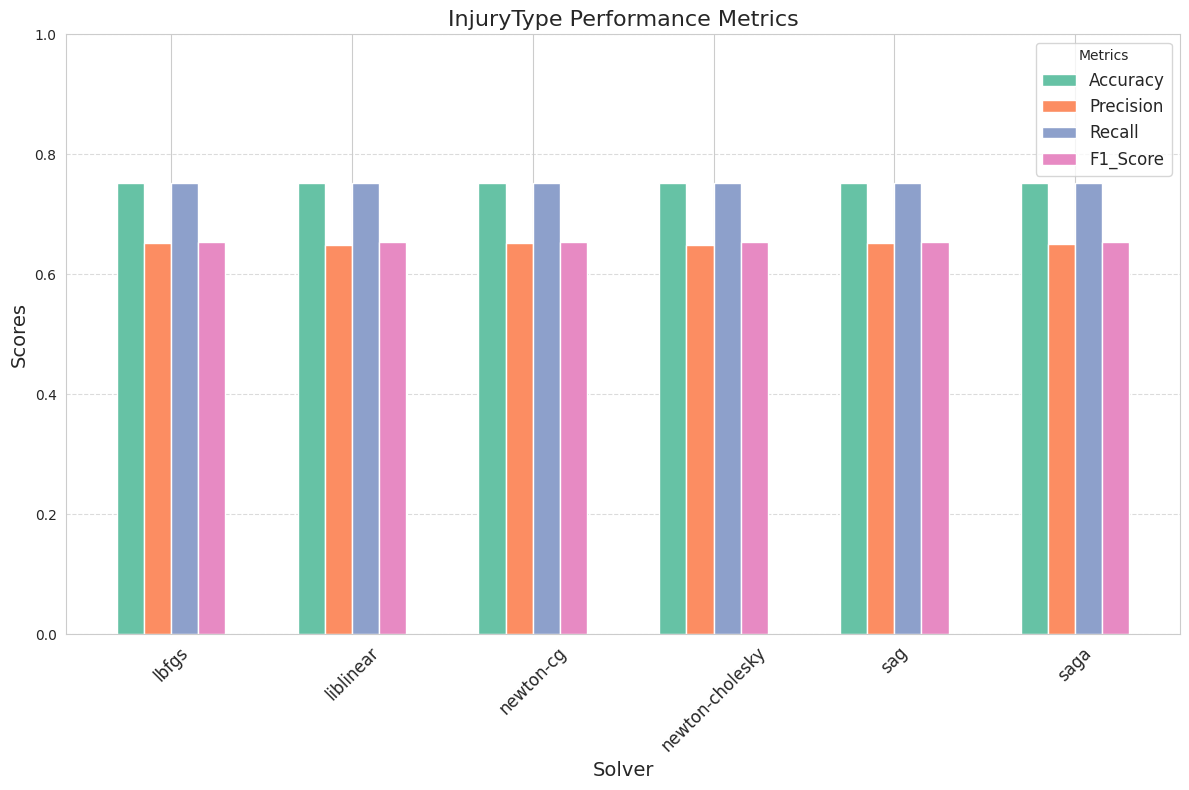

Confusion Matrix for Solver: lbfgs


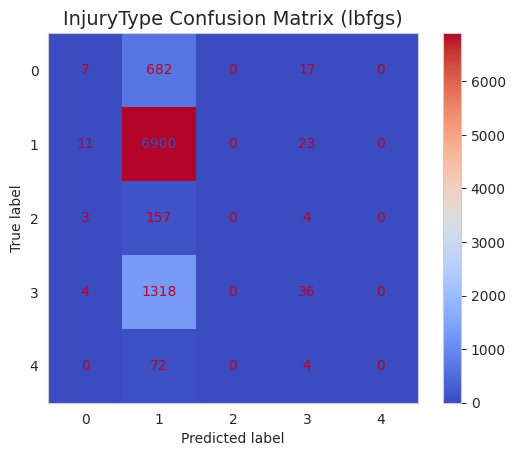

Confusion Matrix for Solver: liblinear


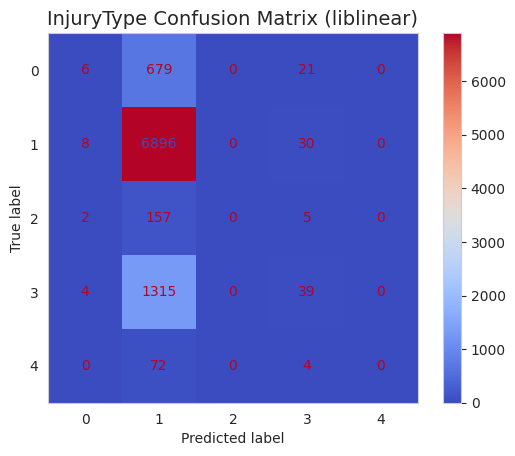

Confusion Matrix for Solver: newton-cg


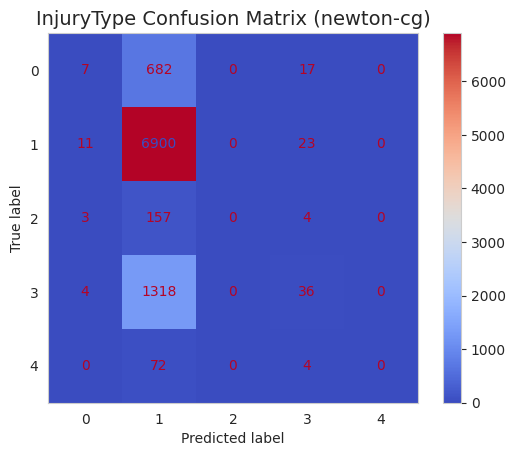

Confusion Matrix for Solver: newton-cholesky


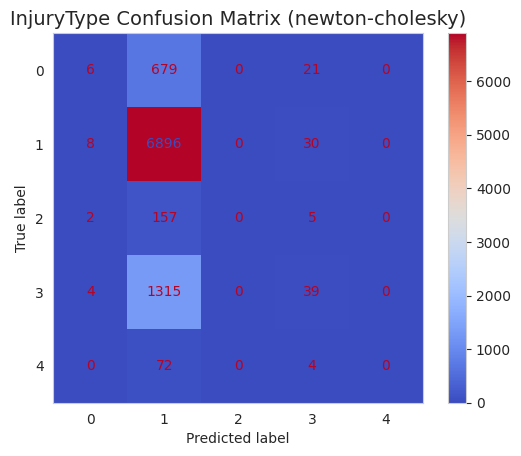

Confusion Matrix for Solver: sag


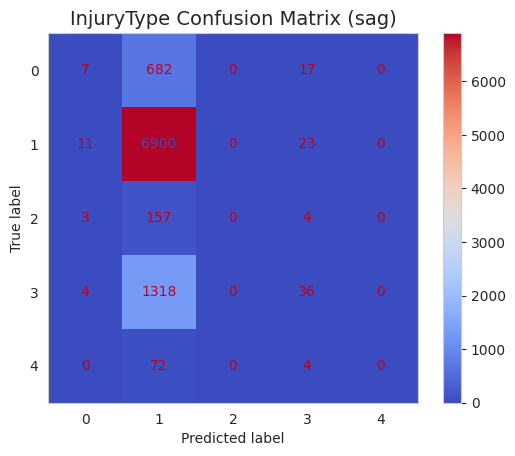

Confusion Matrix for Solver: saga


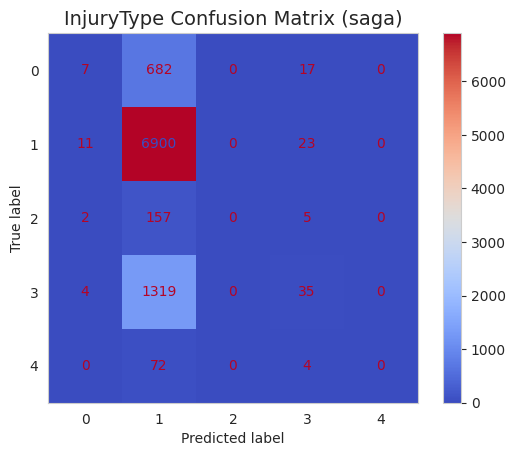

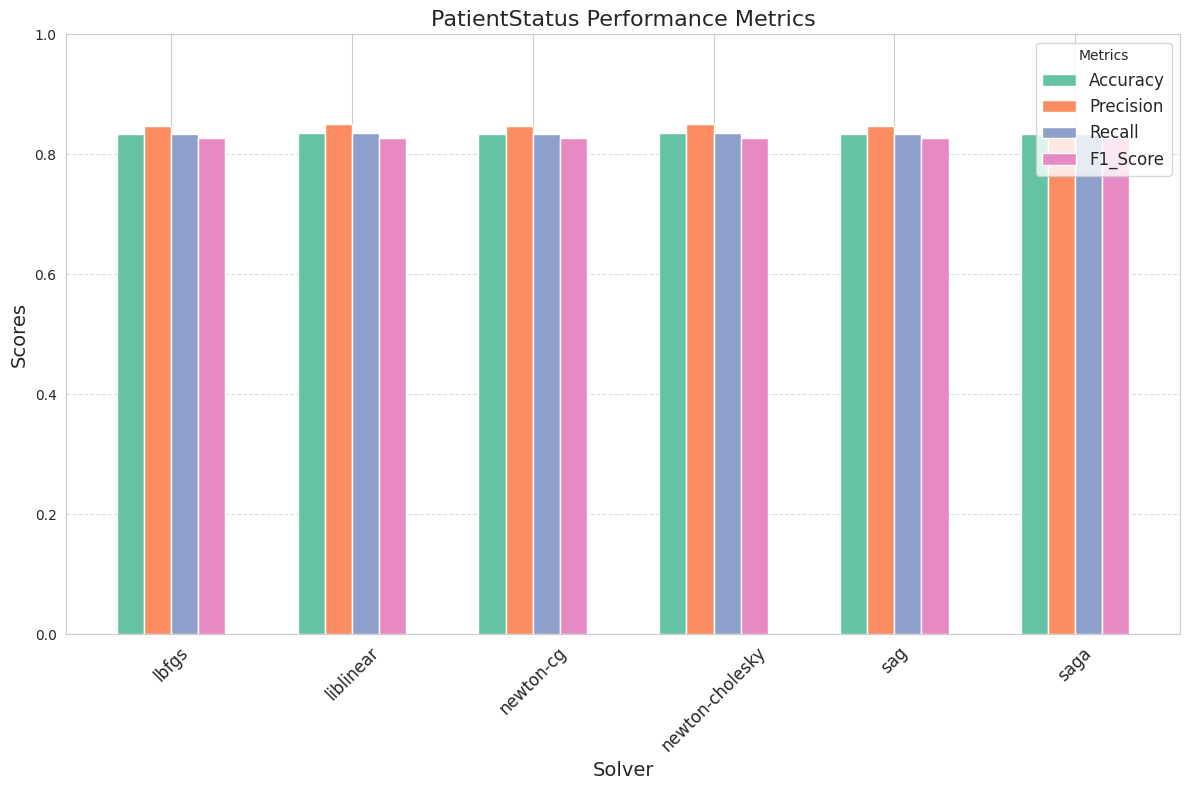

Confusion Matrix for Solver: lbfgs


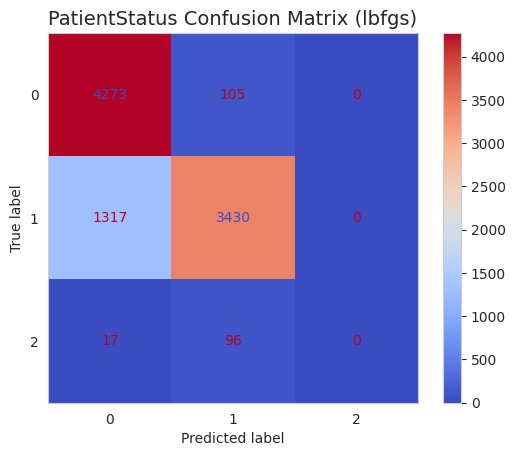

Confusion Matrix for Solver: liblinear


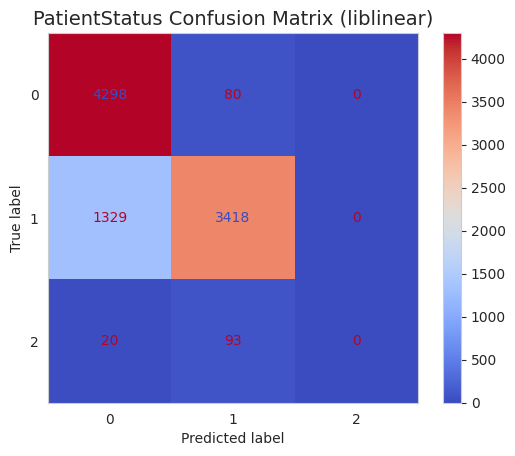

Confusion Matrix for Solver: newton-cg


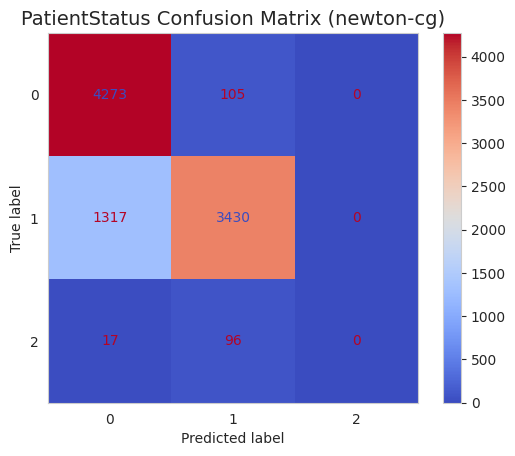

Confusion Matrix for Solver: newton-cholesky


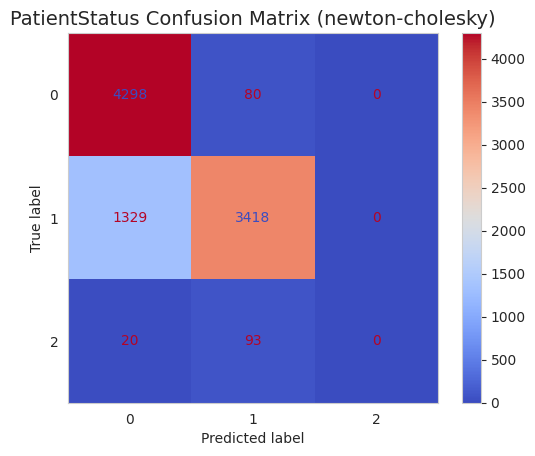

Confusion Matrix for Solver: sag


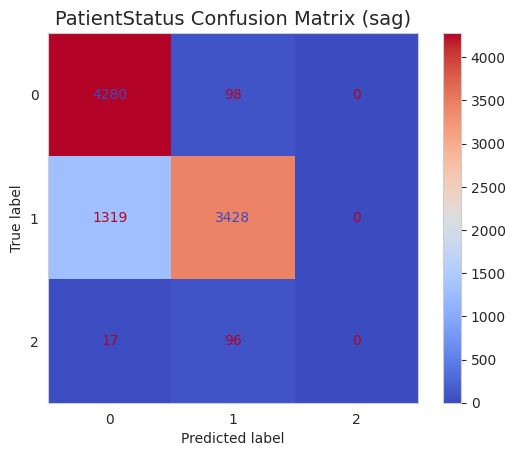

Confusion Matrix for Solver: saga


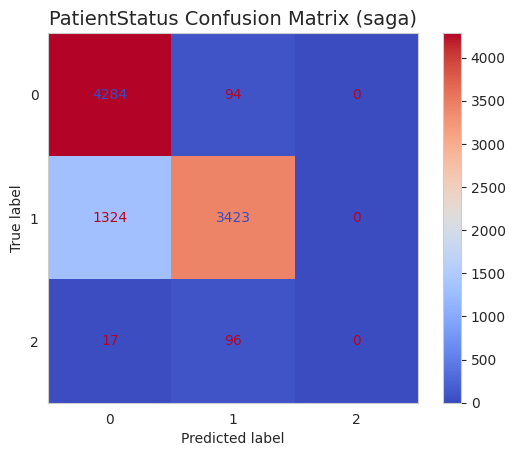

In [67]:
# Function to plot performance metrics using bar chart
def plot_metrics(metrics_df, title):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
    solvers = metrics_df['Solver']
    num_metrics = len(metrics)
    
    # Define custom color palette
    colors = sns.color_palette('Set2', num_metrics)
    
    plt.figure(figsize=(12, 8))
    bar_width = 0.15
    index = pd.Index(range(len(solvers)))

    # Plot each metric as a bar with some separation
    for i, metric in enumerate(metrics):
        plt.bar(index + i * bar_width, metrics_df[metric], width=bar_width, color=colors[i], label=metric)

    plt.title(title, fontsize=16)
    plt.xlabel('Solver', fontsize=14)
    plt.ylabel('Scores', fontsize=14)
    plt.xticks(index + (num_metrics - 1) * bar_width / 2, solvers, rotation=45, fontsize=12)
    plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
    plt.legend(title='Metrics', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot confusion matrix with custom color map
def plot_confusion_matrix(display, solver, title):
    display.plot(cmap='coolwarm')  # Improved color map for better readability
    plt.title(f'{title} Confusion Matrix ({solver})', fontsize=14)
    plt.grid(False)  # Remove grid for cleaner display
    plt.show()

# Plot for InjuryType model
if not results_injury_df.empty:
    plot_metrics(results_injury_df, 'InjuryType Performance Metrics')
    # Plot confusion matrix for each solver
    for result in results_injury:
        print(f"Confusion Matrix for Solver: {result['Solver']}")
        plot_confusion_matrix(result['ConfusionDisplay'], result['Solver'], 'InjuryType')

# Plot for PatientStatus model
if not results_status_df.empty:
    plot_metrics(results_status_df, 'PatientStatus Performance Metrics')
    # Plot confusion matrix for each solver
    for result in results_status:
        print(f"Confusion Matrix for Solver: {result['Solver']}")
        plot_confusion_matrix(result['ConfusionDisplay'], result['Solver'], 'PatientStatus')

**5.13.1. Experimenting with Different max_iter Values for All Solvers**

In [68]:
# Define solvers to experiment with
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

# Define max_iter values to experiment with
max_iters = [50, 100, 150, 200, 250, 300]

# Create all combinations of solvers and max_iter values
combinations = list(product(solvers, max_iters))

# Function to train and evaluate model with specified solver and max_iter
def train_evaluate_model(solver, max_iter, X_train, y_train, X_test, y_test, target_label):
    try:
        # Determine multi_class and penalty based on solver compatibility
        if solver == 'liblinear':
            # liblinear does not support 'multinomial' multi_class
            multi_class = 'ovr'
            penalty = 'l2'
        elif solver == 'newton-cholesky':
            # newton-cholesky requires 'l2' penalty
            multi_class = 'auto'  # Defaults to 'ovr' for binary, 'multinomial' for multiclass
            penalty = 'l2'
        else:
            multi_class = 'multinomial'
            penalty = 'l2'

        # Adjust n_jobs parameter based on solver
        n_jobs = -1 if solver in ['sag', 'saga'] else None

        # Initialize model with specified solver and max_iter
        model = LogisticRegression(
            solver=solver,
            max_iter=max_iter,
            random_state=42,
            n_jobs=n_jobs,
            penalty=penalty,
            multi_class=multi_class,
            # Setting class_weight to 'balanced' can help with class imbalance
            class_weight='balanced'
        )
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

        # Return results as a dictionary
        return {
            'Solver': solver,
            'Max_iter': max_iter,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1_Score': f1,
        }

    except Exception as e:
        # Capture the exception and include solver and max_iter info
        error_message = f"Error with solver={solver}, max_iter={max_iter} for {target_label}: {e}"
        print(error_message)
        return None

# Training and evaluating models for InjuryType
print("\nTraining models for InjuryType with different solvers and max_iter values...")
results_injury = []
for solver, max_iter in combinations:
    result = train_evaluate_model(solver, max_iter, X_train_injury, y_train_injury, X_test_injury, y_test_injury, 'InjuryType')
    if result is not None:
        results_injury.append(result)

# Convert results to DataFrame
results_injury_df = pd.DataFrame(results_injury)

# Training and evaluating models for PatientStatus
print("\nTraining models for PatientStatus with different solvers and max_iter values...")
results_status = []
for solver, max_iter in combinations:
    result = train_evaluate_model(solver, max_iter, X_train_status, y_train_status, X_test_status, y_test_status, 'PatientStatus')
    if result is not None:
        results_status.append(result)

# Convert results to DataFrame
results_status_df = pd.DataFrame(results_status)


Training models for InjuryType with different solvers and max_iter values...


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef


Training models for PatientStatus with different solvers and max_iter values...


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

**5.14. Analyzing Results and Plotting Learning Curves**

**5.14.1. Identifying the Best Models**


Best InjuryType Model:
Solver: liblinear
Accuracy: 0.6533
Precision: 0.6846
Recall: 0.6533
F1 Score: 0.6612


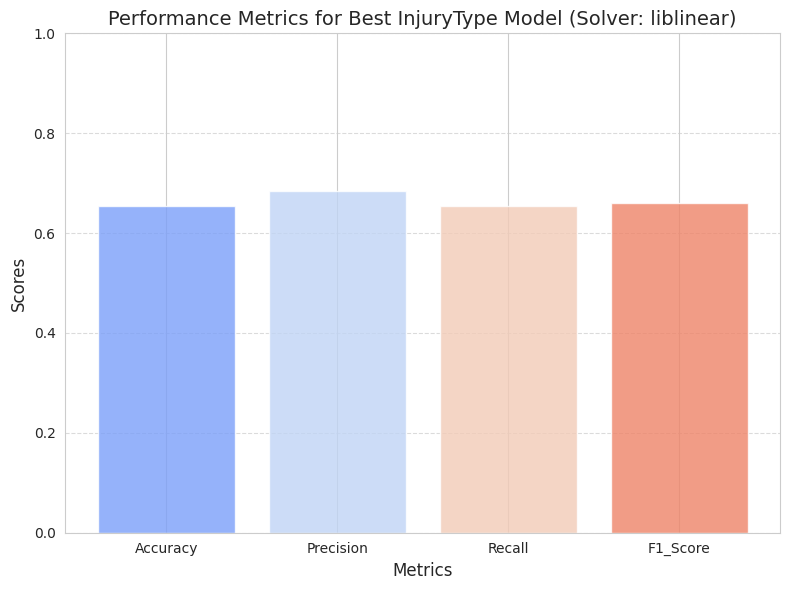


Best PatientStatus Model:
Solver: liblinear
Accuracy: 0.8323
Precision: 0.8540
Recall: 0.8323
F1 Score: 0.8266


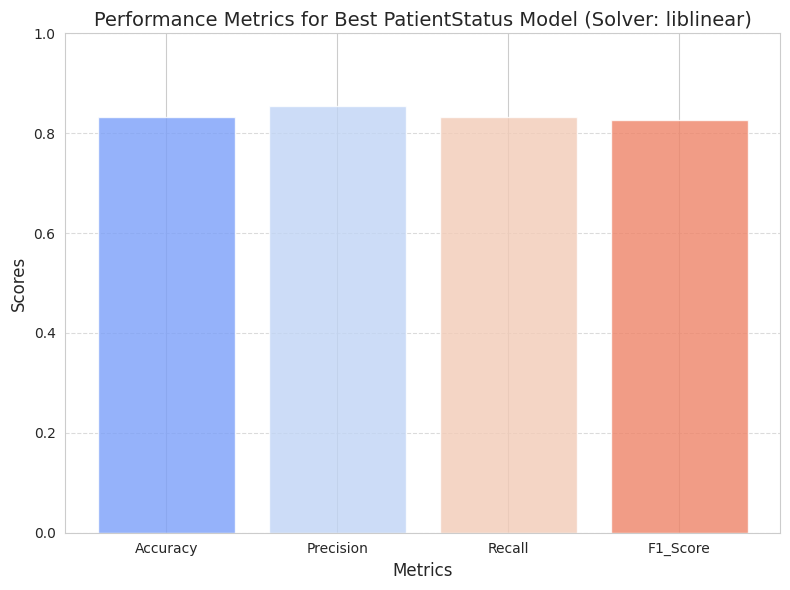

In [70]:
# Function to identify and visualize the best model based on accuracy
def visualize_best_model(results_df, target_label):
    # Identify the best model
    best_model = results_df.loc[results_df['Accuracy'].idxmax()]
    
    # Print details of the best model
    print(f"\nBest {target_label} Model:")
    print(f"Solver: {best_model['Solver']}")
    print(f"Accuracy: {best_model['Accuracy']:.4f}")
    print(f"Precision: {best_model['Precision']:.4f}")
    print(f"Recall: {best_model['Recall']:.4f}")
    print(f"F1 Score: {best_model['F1_Score']:.4f}")

    # Bar chart to visualize the metrics of the best model
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
    scores = [best_model[metric] for metric in metrics]
    colors = sns.color_palette('coolwarm', len(metrics))
    
    plt.figure(figsize=(8, 6))
    plt.bar(metrics, scores, color=colors, alpha=0.8)
    plt.title(f'Performance Metrics for Best {target_label} Model (Solver: {best_model["Solver"]})', fontsize=14)
    plt.ylim(0, 1)
    plt.ylabel('Scores', fontsize=12)
    plt.xlabel('Metrics', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    return best_model

# Get and visualize the best model for InjuryType
best_injury = visualize_best_model(results_injury_df, 'InjuryType')

# Get and visualize the best model for PatientStatus
best_status = visualize_best_model(results_status_df, 'PatientStatus')

**5.14.2. Plotting Learning Curves**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


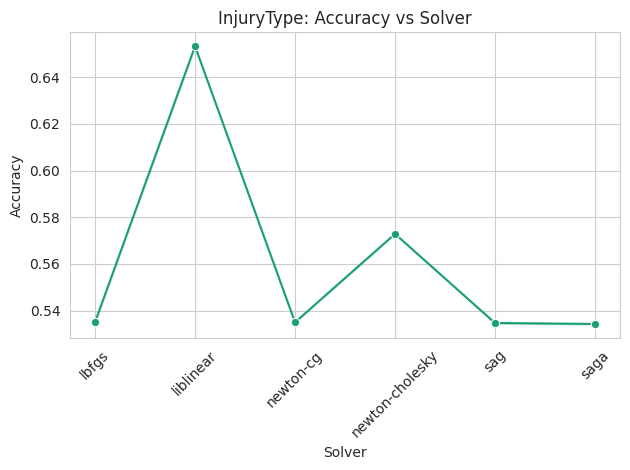

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


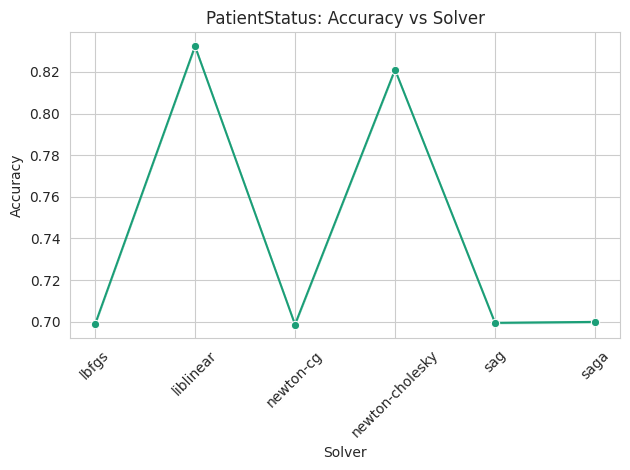

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


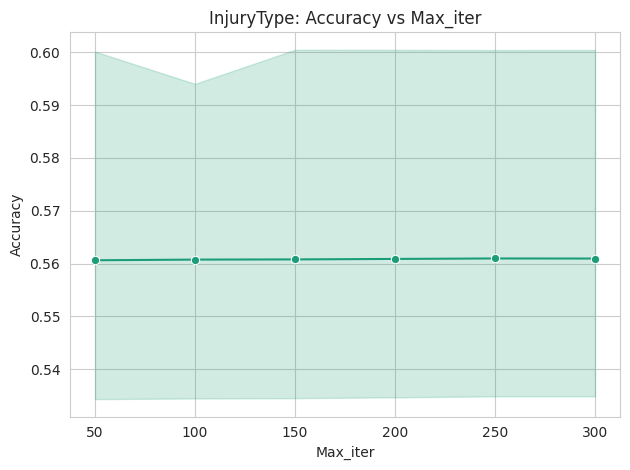

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


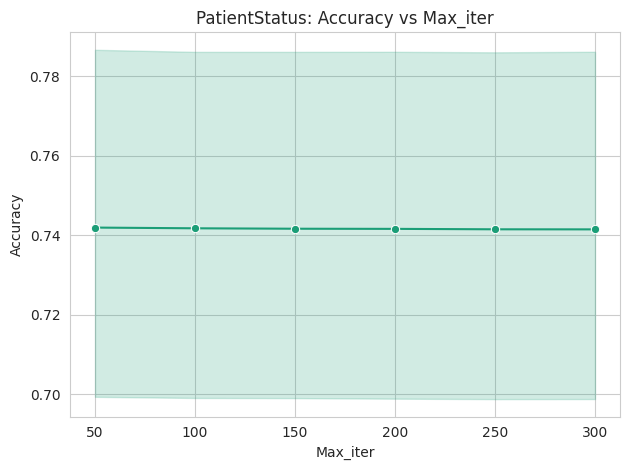

In [71]:
# Plotting Accuracy vs Solver

# For InjuryType
plt.figure()
sns.lineplot(data=results_injury_df, x='Solver', y='Accuracy', marker='o')
plt.title('InjuryType: Accuracy vs Solver')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# For PatientStatus
plt.figure()
sns.lineplot(data=results_status_df, x='Solver', y='Accuracy', marker='o')
plt.title('PatientStatus: Accuracy vs Solver')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Accuracy vs Max_iter

# For InjuryType
plt.figure()
sns.lineplot(data=results_injury_df, x='Max_iter', y='Accuracy', marker='o')
plt.title('InjuryType: Accuracy vs Max_iter')
plt.xlabel('Max_iter')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

# For PatientStatus
plt.figure()
sns.lineplot(data=results_status_df, x='Max_iter', y='Accuracy', marker='o')
plt.title('PatientStatus: Accuracy vs Max_iter')
plt.xlabel('Max_iter')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

**Phase 3**

**5.15. Model Training and Evaluation with Other Algorithms**

**5.15.1. Prepare Datasets**

In [72]:
# Define target columns
target_cols = ['InjuryType', 'PatientStatus']

# For InjuryType model:
# Features (X) and target (y)
X_train_injury = train_set_encoded.drop(columns=target_cols)
y_train_injury = train_set_encoded['InjuryType']

X_test_injury = test_set_encoded.drop(columns=target_cols)
y_test_injury = test_set_encoded['InjuryType']

# For PatientStatus model:
# Features (X) and target (y)
X_train_status = train_set_encoded.drop(columns=target_cols)
y_train_status = train_set_encoded['PatientStatus']

X_test_status = test_set_encoded.drop(columns=target_cols)
y_test_status = test_set_encoded['PatientStatus']

**5.16. Decision Tree**

**5.16.1. Train and Evaluate Decision Tree Models**

In [73]:
# Define max_depth values to experiment with
max_depths = [4, 5, 6, 7, 8, 9]

# Function to train and evaluate Decision Tree model
def train_evaluate_decision_tree(max_depth, X_train, y_train, X_test, y_test, target_label):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Return results as a dictionary
    return {
        'Max_depth': max_depth,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1,
    }

**5.16.2. InjuryType Model**

In [74]:
# Training and evaluating Decision Tree models for InjuryType
results_dt_injury = []
for max_depth in max_depths:
    result = train_evaluate_decision_tree(max_depth, X_train_injury, y_train_injury, X_test_injury, y_test_injury, 'InjuryType')
    results_dt_injury.append(result)

# Convert results to DataFrame
results_dt_injury_df = pd.DataFrame(results_dt_injury)

**5.16.3. PatientStatus Model**

In [75]:
# Training and evaluating Decision Tree models for PatientStatus
results_dt_status = []
for max_depth in max_depths:
    result = train_evaluate_decision_tree(max_depth, X_train_status, y_train_status, X_test_status, y_test_status, 'PatientStatus')
    results_dt_status.append(result)

# Convert results to DataFrame
results_dt_status_df = pd.DataFrame(results_dt_status)

**5.16.4. Plot Accuracy vs Max_depth**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


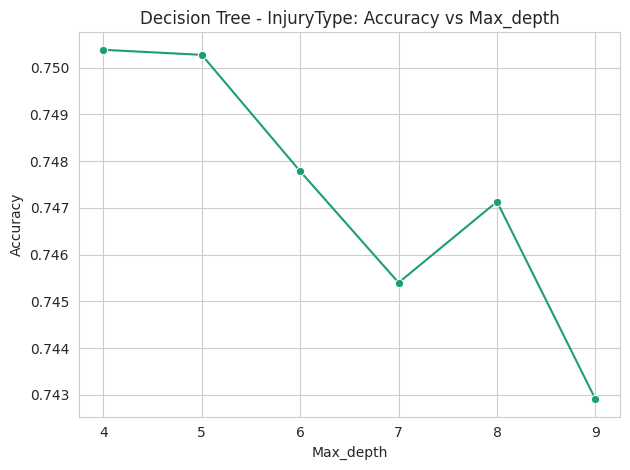

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


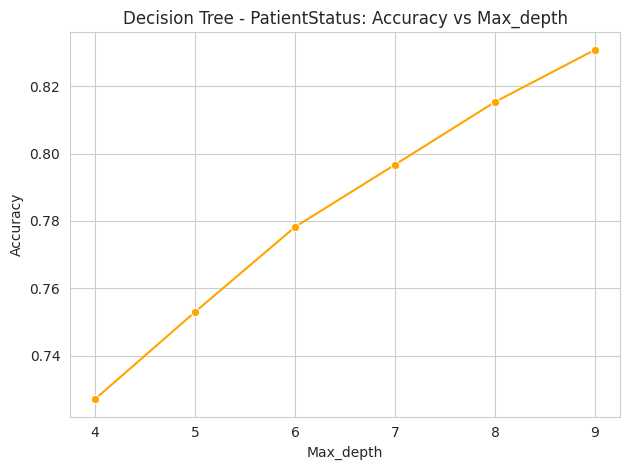

In [76]:
# For InjuryType
plt.figure()
sns.lineplot(data=results_dt_injury_df, x='Max_depth', y='Accuracy', marker='o')
plt.title('Decision Tree - InjuryType: Accuracy vs Max_depth')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.xticks(max_depths)
plt.tight_layout()
plt.show()

# For PatientStatus
plt.figure()
sns.lineplot(data=results_dt_status_df, x='Max_depth', y='Accuracy', marker='o', color='orange')
plt.title('Decision Tree - PatientStatus: Accuracy vs Max_depth')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.xticks(max_depths)
plt.tight_layout()
plt.show()

**5.17. Random Forest**

**5.17.1. Train and Evaluate Random Forest Models**

In [77]:
# Define n_estimators values to experiment with
n_estimators_list = [10, 50, 100, 200]

# Function to train and evaluate Random Forest model
def train_evaluate_random_forest(n_estimators, X_train, y_train, X_test, y_test, target_label):
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Return results as a dictionary
    return {
        'N_estimators': n_estimators,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1,
    }

**5.17.2. InjuryType Model**

In [78]:
# Training and evaluating Random Forest models for InjuryType
results_rf_injury = []
for n_estimators in n_estimators_list:
    result = train_evaluate_random_forest(n_estimators, X_train_injury, y_train_injury, X_test_injury, y_test_injury, 'InjuryType')
    results_rf_injury.append(result)

# Convert results to DataFrame
results_rf_injury_df = pd.DataFrame(results_rf_injury)

**5.17.3. PatientStatus Model**

In [79]:
# Training and evaluating Random Forest models for PatientStatus
results_rf_status = []
for n_estimators in n_estimators_list:
    result = train_evaluate_random_forest(n_estimators, X_train_status, y_train_status, X_test_status, y_test_status, 'PatientStatus')
    results_rf_status.append(result)

# Convert results to DataFrame
results_rf_status_df = pd.DataFrame(results_rf_status)

**5.17.4. Plot Accuracy vs N_estimators**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


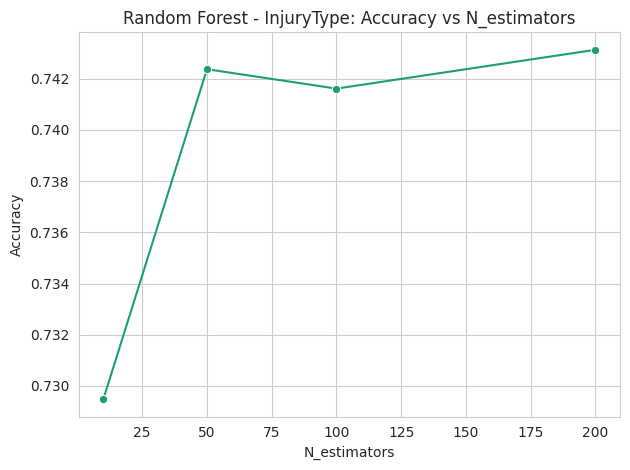

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


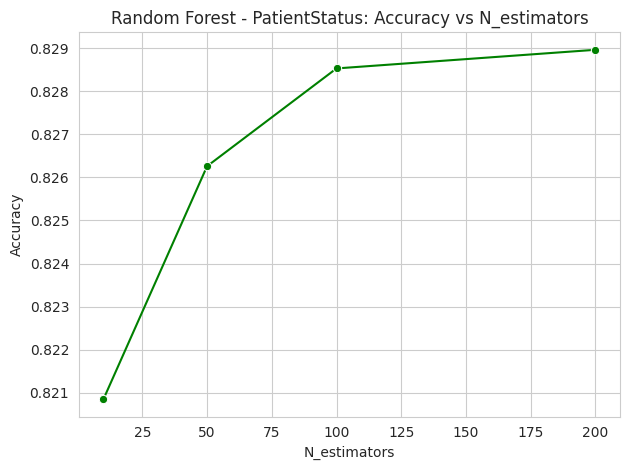

In [80]:
# For InjuryType
plt.figure()
sns.lineplot(data=results_rf_injury_df, x='N_estimators', y='Accuracy', marker='o')
plt.title('Random Forest - InjuryType: Accuracy vs N_estimators')
plt.xlabel('N_estimators')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

# For PatientStatus
plt.figure()
sns.lineplot(data=results_rf_status_df, x='N_estimators', y='Accuracy', marker='o', color='green')
plt.title('Random Forest - PatientStatus: Accuracy vs N_estimators')
plt.xlabel('N_estimators')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

**5.18. XGBoost**

**5.18.1. Train and Evaluate XGBoost Models**

In [81]:
# Define learning_rate values to experiment with
learning_rates = [0.001, 0.01, 0.1, 1]

# Function to train and evaluate XGBoost model
def train_evaluate_xgboost(learning_rate, X_train, y_train, X_test, y_test, target_label):
    model = XGBClassifier(learning_rate=learning_rate, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Return results as a dictionary
    return {
        'Learning_rate': learning_rate,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1,
    }

**5.18.2. InjuryType Model**

In [82]:
# Training and evaluating XGBoost models for InjuryType
results_xgb_injury = []
for lr in learning_rates:
    result = train_evaluate_xgboost(lr, X_train_injury, y_train_injury, X_test_injury, y_test_injury, 'InjuryType')
    results_xgb_injury.append(result)

# Convert results to DataFrame
results_xgb_injury_df = pd.DataFrame(results_xgb_injury)

**5.18.3. PatientStatus Model**

In [83]:
# Training and evaluating XGBoost models for PatientStatus
results_xgb_status = []
for lr in learning_rates:
    result = train_evaluate_xgboost(lr, X_train_status, y_train_status, X_test_status, y_test_status, 'PatientStatus')
    results_xgb_status.append(result)

# Convert results to DataFrame
results_xgb_status_df = pd.DataFrame(results_xgb_status)

**5.18.4. Plot Accuracy vs Learning_rate**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


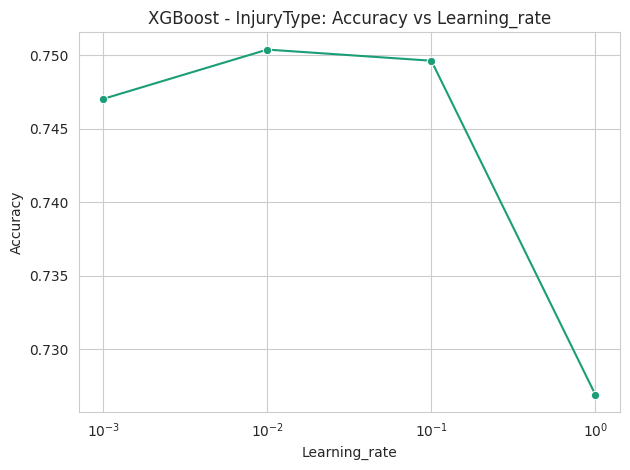

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


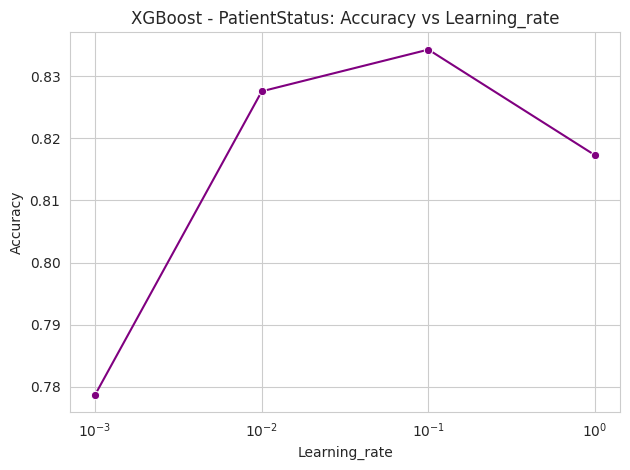

In [84]:
# For InjuryType
plt.figure()
sns.lineplot(data=results_xgb_injury_df, x='Learning_rate', y='Accuracy', marker='o')
plt.title('XGBoost - InjuryType: Accuracy vs Learning_rate')
plt.xlabel('Learning_rate')
plt.ylabel('Accuracy')
plt.xscale('log')  # Log scale for learning rate
plt.tight_layout()
plt.show()

# For PatientStatus
plt.figure()
sns.lineplot(data=results_xgb_status_df, x='Learning_rate', y='Accuracy', marker='o', color='purple')
plt.title('XGBoost - PatientStatus: Accuracy vs Learning_rate')
plt.xlabel('Learning_rate')
plt.ylabel('Accuracy')
plt.xscale('log')  # Log scale for learning rate
plt.tight_layout()
plt.show()

**5.19. Support Vector Machine (SVM)**

**5.19.1. Train and Evaluate SVM Models**

In [85]:
# Define kernel types to experiment with
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Function to train and evaluate SVM model
def train_evaluate_svm(kernel, X_train, y_train, X_test, y_test, target_label):
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Return results as a dictionary
    return {
        'Kernel': kernel,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1,
    }

**5.19.2. InjuryType Model**

In [86]:
# Training and evaluating SVM models for InjuryType
results_svm_injury = []
for kernel in kernels:
    result = train_evaluate_svm(kernel, X_train_injury, y_train_injury, X_test_injury, y_test_injury, 'InjuryType')
    results_svm_injury.append(result)

# Convert results to DataFrame
results_svm_injury_df = pd.DataFrame(results_svm_injury)

**5.19.3. PatientStatus Model**

In [87]:
# Training and evaluating SVM models for PatientStatus
results_svm_status = []
for kernel in kernels:
    result = train_evaluate_svm(kernel, X_train_status, y_train_status, X_test_status, y_test_status, 'PatientStatus')
    results_svm_status.append(result)

# Convert results to DataFrame
results_svm_status_df = pd.DataFrame(results_svm_status)

**5.19.4. Plot Accuracy vs Kernel**

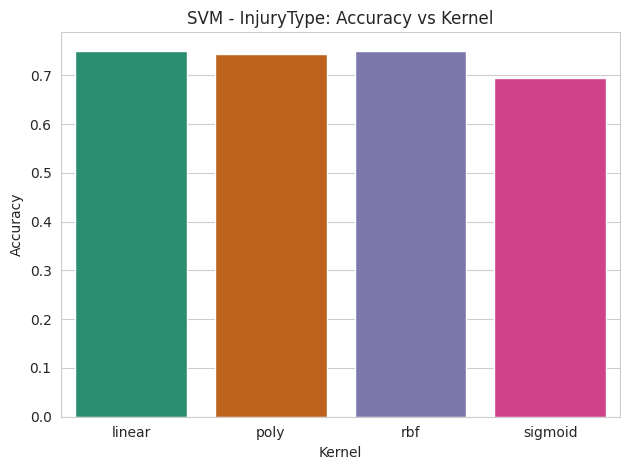

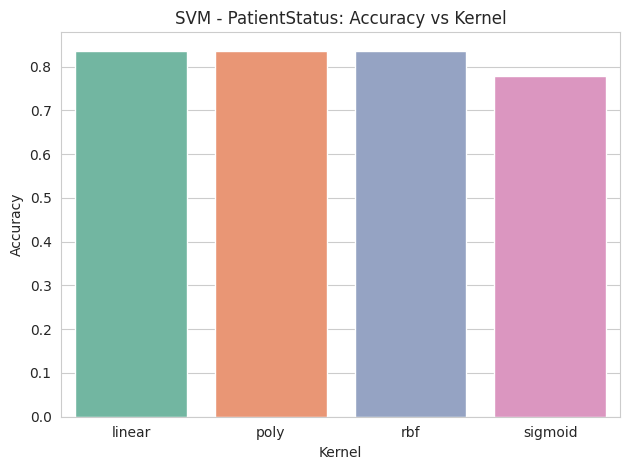

In [88]:
# For InjuryType
plt.figure()
sns.barplot(data=results_svm_injury_df, x='Kernel', y='Accuracy')
plt.title('SVM - InjuryType: Accuracy vs Kernel')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

# For PatientStatus
plt.figure()
sns.barplot(data=results_svm_status_df, x='Kernel', y='Accuracy', palette='Set2')
plt.title('SVM - PatientStatus: Accuracy vs Kernel')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

**5.20. Prepare Comparison Table & Combine Results**

**5.20.1. For InjuryType**

In [89]:
# Logistic Regression Best Result
best_lr_injury = results_injury_df.loc[results_injury_df['Accuracy'].idxmax()]
best_lr_injury = best_lr_injury[['Solver', 'Max_iter', 'Accuracy', 'Precision', 'Recall', 'F1_Score']]
best_lr_injury['Model'] = 'Logistic Regression'

# Decision Tree Best Result
best_dt_injury = results_dt_injury_df.loc[results_dt_injury_df['Accuracy'].idxmax()]
best_dt_injury['Model'] = 'Decision Tree'

# Random Forest Best Result
best_rf_injury = results_rf_injury_df.loc[results_rf_injury_df['Accuracy'].idxmax()]
best_rf_injury['Model'] = 'Random Forest'

# XGBoost Best Result
best_xgb_injury = results_xgb_injury_df.loc[results_xgb_injury_df['Accuracy'].idxmax()]
best_xgb_injury['Model'] = 'XGBoost'

# SVM Best Result
best_svm_injury = results_svm_injury_df.loc[results_svm_injury_df['Accuracy'].idxmax()]
best_svm_injury['Model'] = 'SVM'

# Combine into a DataFrame
comparison_injury = pd.DataFrame([
    best_lr_injury,
    best_dt_injury,
    best_rf_injury,
    best_xgb_injury,
    best_svm_injury
])

/tmp/ipykernel_23/1946177920.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_dt_injury['Model'] = 'Decision Tree'
/tmp/ipykernel_23/1946177920.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_dt_injury['Model'] = 'Decision Tree'
/tmp/ipykernel_23/1946177920.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_rf_injury['Model'] = 'Random Forest'
/tmp/ipykernel_23/1946177920.py:12: SettingWithCopyWarning: 
A value 

**5.20.2. For PatientStatus**

In [90]:
# Logistic Regression Best Result
best_lr_status = results_status_df.loc[results_status_df['Accuracy'].idxmax()]
best_lr_status = best_lr_status[['Solver', 'Max_iter', 'Accuracy', 'Precision', 'Recall', 'F1_Score']]
best_lr_status['Model'] = 'Logistic Regression'

# Decision Tree Best Result
best_dt_status = results_dt_status_df.loc[results_dt_status_df['Accuracy'].idxmax()]
best_dt_status['Model'] = 'Decision Tree'

# Random Forest Best Result
best_rf_status = results_rf_status_df.loc[results_rf_status_df['Accuracy'].idxmax()]
best_rf_status['Model'] = 'Random Forest'

# XGBoost Best Result
best_xgb_status = results_xgb_status_df.loc[results_xgb_status_df['Accuracy'].idxmax()]
best_xgb_status['Model'] = 'XGBoost'

# SVM Best Result
best_svm_status = results_svm_status_df.loc[results_svm_status_df['Accuracy'].idxmax()]
best_svm_status['Model'] = 'SVM'

# Combine into a DataFrame
comparison_status = pd.DataFrame([
    best_lr_status,
    best_dt_status,
    best_rf_status,
    best_xgb_status,
    best_svm_status
])

/tmp/ipykernel_23/1563390361.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_dt_status['Model'] = 'Decision Tree'
/tmp/ipykernel_23/1563390361.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_dt_status['Model'] = 'Decision Tree'
/tmp/ipykernel_23/1563390361.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_rf_status['Model'] = 'Random Forest'
/tmp/ipykernel_23/1563390361.py:12: SettingWithCopyWarning: 
A value 

**5.21. Display Comparison Tables**

**5.21.1. InjuryType Comparison**

Comparison of Models for InjuryType:


Model  Accuracy  Precision    Recall  F1_Score
6  Logistic Regression  0.653280   0.684561  0.653280  0.661179
0        Decision Tree  0.750379   0.648739  0.750379  0.663077
3        Random Forest  0.743126   0.633017  0.743126  0.659983
1              XGBoost  0.750379   0.651558  0.750379  0.660164
2                  SVM  0.750704   0.649547  0.750704  0.660715

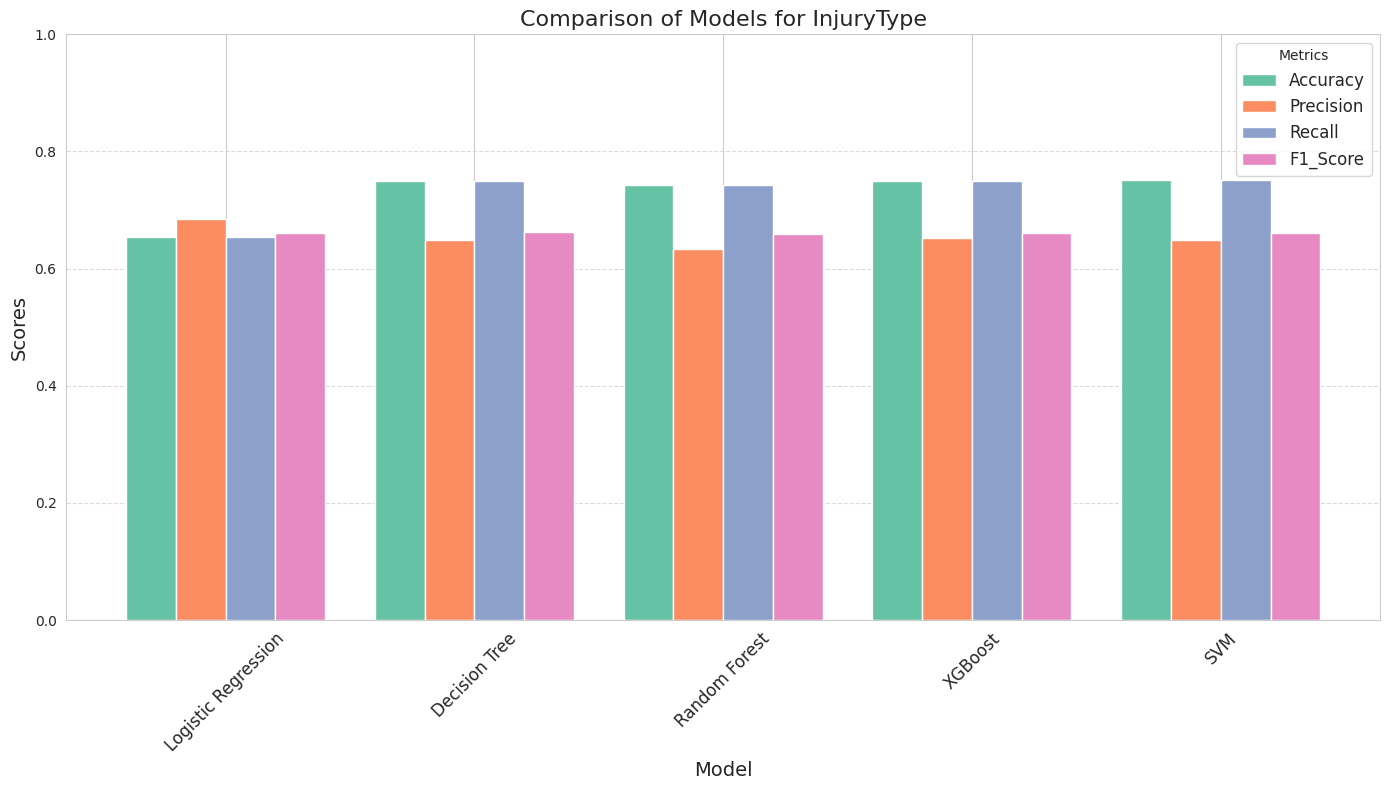

In [92]:
# Visualize comparison of models for InjuryType
def visualize_model_comparison(comparison_df, target_label):
    # Extract metrics for plotting
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
    models = comparison_df['Model']
    
    # Set up the bar plot
    plt.figure(figsize=(14, 8))
    bar_width = 0.2
    index = pd.Index(range(len(models)))

    # Define color palette
    colors = sns.color_palette('Set2', len(metrics))

    # Plot each metric as a bar
    for i, metric in enumerate(metrics):
        plt.bar(index + i * bar_width, comparison_df[metric], width=bar_width, label=metric, color=colors[i])

    # Customize the chart
    plt.title(f'Comparison of Models for {target_label}', fontsize=16)
    plt.xlabel('Model', fontsize=14)
    plt.ylabel('Scores', fontsize=14)
    plt.xticks(index + (len(metrics) - 1) * bar_width / 2, models, rotation=45, fontsize=12)
    plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
    plt.legend(title='Metrics', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Ensure comparison_injury DataFrame is clean
comparison_injury = comparison_injury[['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score']]

# Display the comparison DataFrame
print("Comparison of Models for InjuryType:")
display(comparison_injury)

# Visualize the comparison
visualize_model_comparison(comparison_injury, 'InjuryType')

**5.21.2. PatientStatus Comparison**

Comparison of Models for PatientStatus:


Model  Accuracy  Precision    Recall  F1_Score
6  Logistic Regression  0.832323   0.854033  0.832323  0.826556
5        Decision Tree  0.830808   0.855150  0.830808  0.822829
3        Random Forest  0.828967   0.828326  0.828967  0.822875
2              XGBoost  0.834271   0.846819  0.834271  0.826902
1                  SVM  0.836328   0.854030  0.836328  0.829283

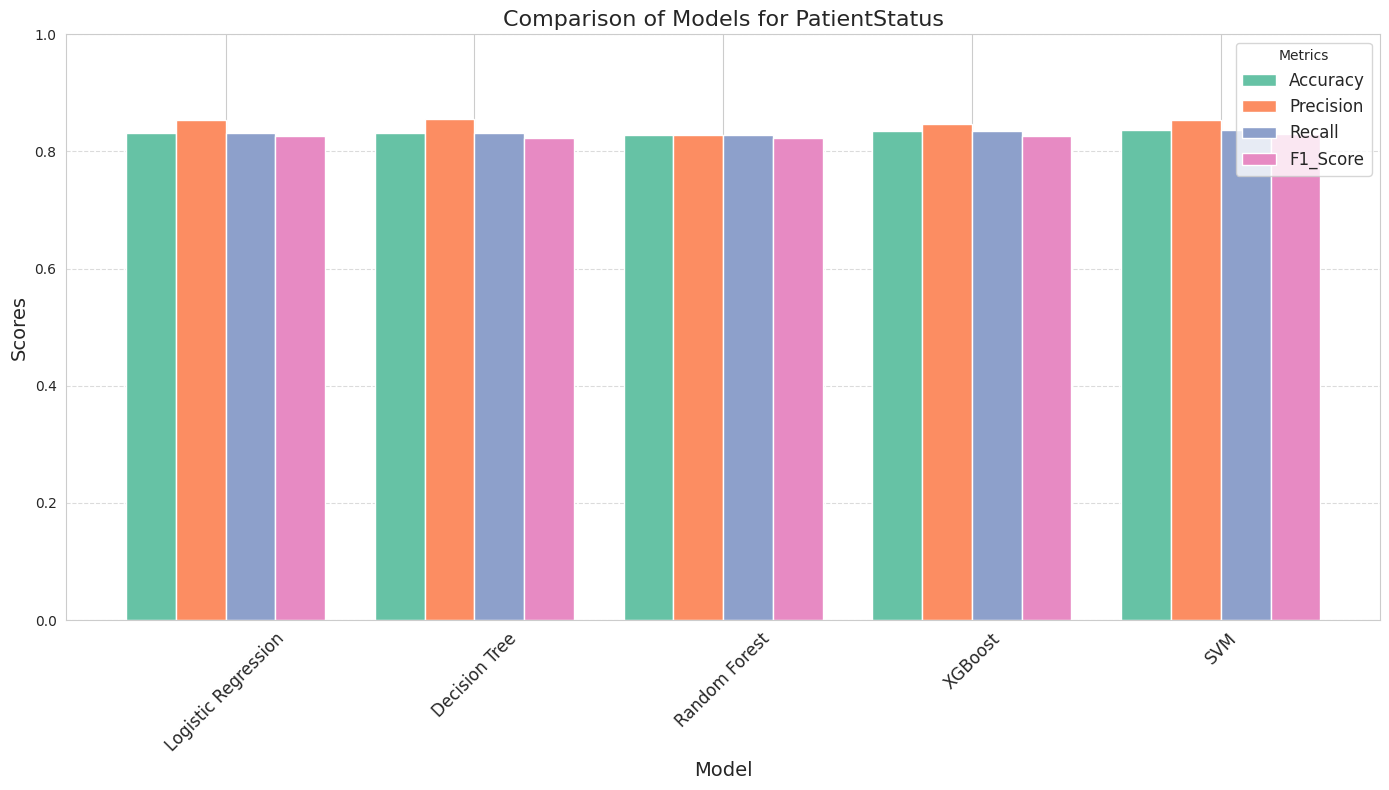

In [93]:
# Visualize comparison of models for PatientStatus
def visualize_model_comparison(comparison_df, target_label):
    # Extract metrics for plotting
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
    models = comparison_df['Model']
    
    # Set up the bar plot
    plt.figure(figsize=(14, 8))
    bar_width = 0.2
    index = pd.Index(range(len(models)))

    # Define color palette
    colors = sns.color_palette('Set2', len(metrics))

    # Plot each metric as a bar
    for i, metric in enumerate(metrics):
        plt.bar(index + i * bar_width, comparison_df[metric], width=bar_width, label=metric, color=colors[i])

    # Customize the chart
    plt.title(f'Comparison of Models for {target_label}', fontsize=16)
    plt.xlabel('Model', fontsize=14)
    plt.ylabel('Scores', fontsize=14)
    plt.xticks(index + (len(metrics) - 1) * bar_width / 2, models, rotation=45, fontsize=12)
    plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
    plt.legend(title='Metrics', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Ensure comparison_status DataFrame is clean
comparison_status = comparison_status[['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score']]

# Display the comparison DataFrame
print("Comparison of Models for PatientStatus:")
display(comparison_status)

# Visualize the comparison
visualize_model_comparison(comparison_status, 'PatientStatus')

**Phase 4**